In [3]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from utils import Logger

# Gather Dataset

In [4]:
DATA_IMAGES_PATH = '~/datasets/SUNDATABASE/Images/b/beach'
DATA_ANNOTATIONS_PATH = '~/datasets/SUNDATABASE/Annotations/b/beach'


In [2]:
DATA_IMAGES_PATH = '~/datasets/SUNDATABASE/Images/b/beach'
DATA_ANNOTATIONS_PATH = '~/datasets/SUNDATABASE/Annotations/b/beach'

NameError: name 'SUNinstall' is not defined

In [ ]:
# Load data
data = fetch_local_data()

# Create loader with data, so that we can iterate over it
data_loader = DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)

# Discriminator

In [3]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
    
discriminator = DiscriminatorNet()

# Generator

In [4]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

# Helpers

In [5]:
# Discriminator Helpers

def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

# Generator Helpers

def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(3, 100))
    return n

In [6]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
loss = nn.BCELoss()

# Discriminator Loss
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [7]:
# Testing
num_test_samples = 16
test_noise = noise(num_test_samples)

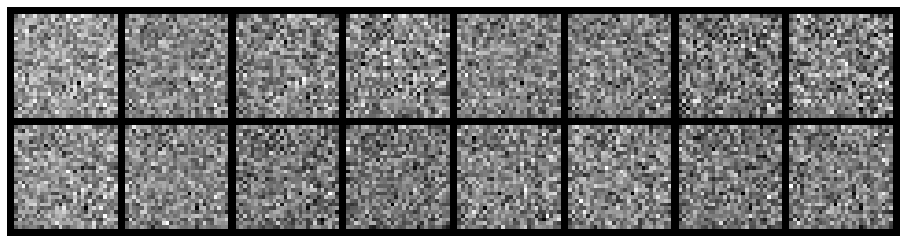

Epoch: [0/200], Batch Num: [0/600]
Discriminator Loss: 1.3595, Generator Loss: 0.7080
D(x): 0.5063, D(G(z)): 0.4926


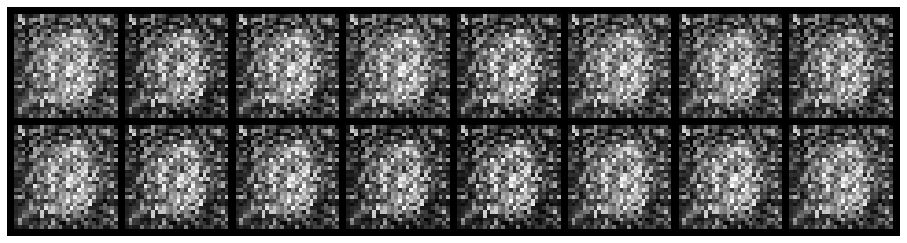

Epoch: [0/200], Batch Num: [100/600]
Discriminator Loss: 0.9811, Generator Loss: 2.0898
D(x): 0.7796, D(G(z)): 0.4393


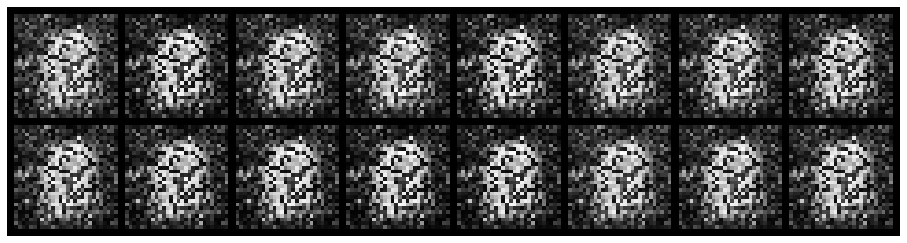

Epoch: [0/200], Batch Num: [200/600]
Discriminator Loss: 0.9560, Generator Loss: 1.8802
D(x): 0.8524, D(G(z)): 0.4825


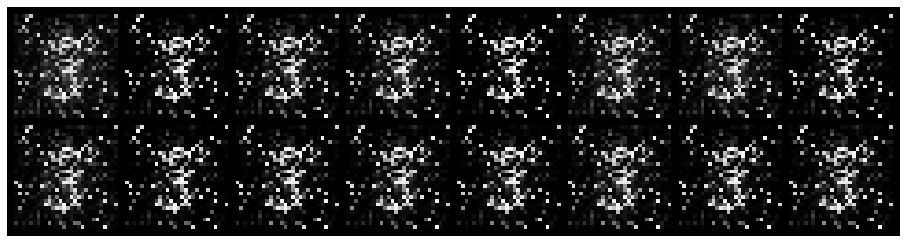

Epoch: [0/200], Batch Num: [300/600]
Discriminator Loss: 1.2484, Generator Loss: 4.8731
D(x): 0.6835, D(G(z)): 0.2380


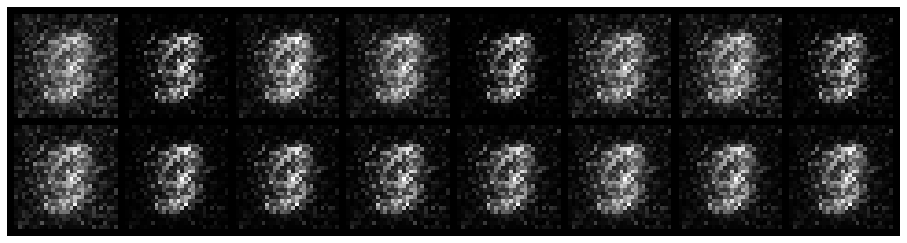

Epoch: [0/200], Batch Num: [400/600]
Discriminator Loss: 3.5144, Generator Loss: 0.6704
D(x): 0.3237, D(G(z)): 0.6852


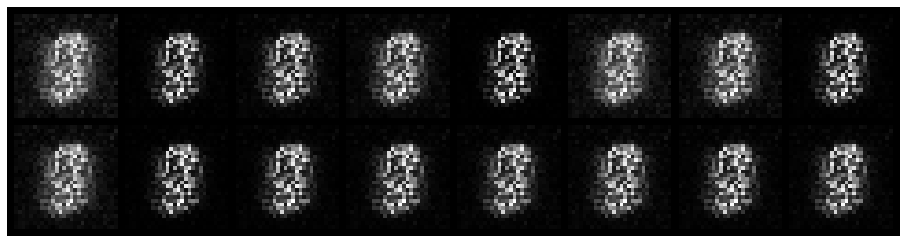

Epoch: [0/200], Batch Num: [500/600]
Discriminator Loss: 0.8095, Generator Loss: 1.4339
D(x): 0.6744, D(G(z)): 0.2875


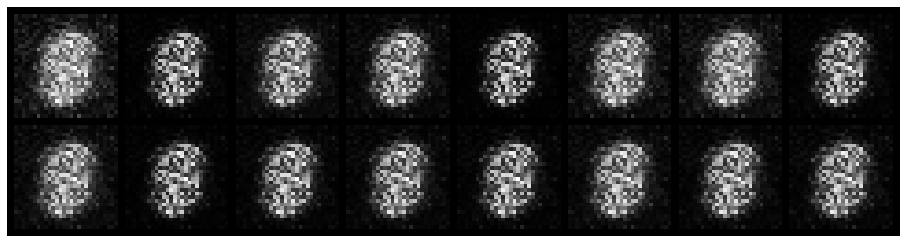

Epoch: [1/200], Batch Num: [0/600]
Discriminator Loss: 0.7361, Generator Loss: 2.5479
D(x): 0.6298, D(G(z)): 0.1696


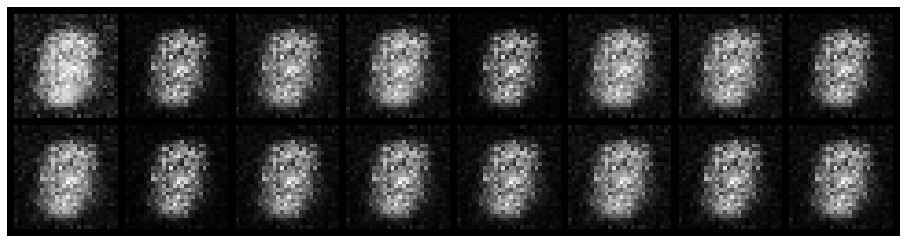

Epoch: [1/200], Batch Num: [100/600]
Discriminator Loss: 2.6145, Generator Loss: 0.4669
D(x): 0.4560, D(G(z)): 0.6878


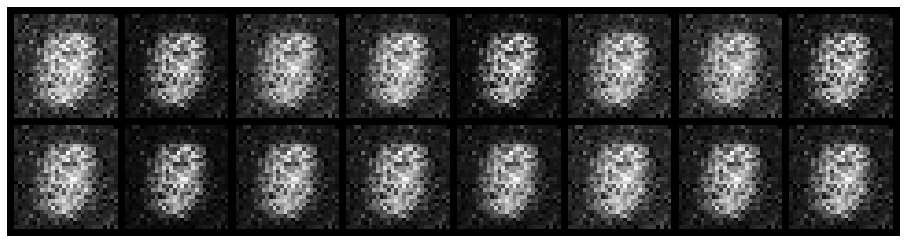

Epoch: [1/200], Batch Num: [200/600]
Discriminator Loss: 1.0300, Generator Loss: 1.3422
D(x): 0.6523, D(G(z)): 0.3839


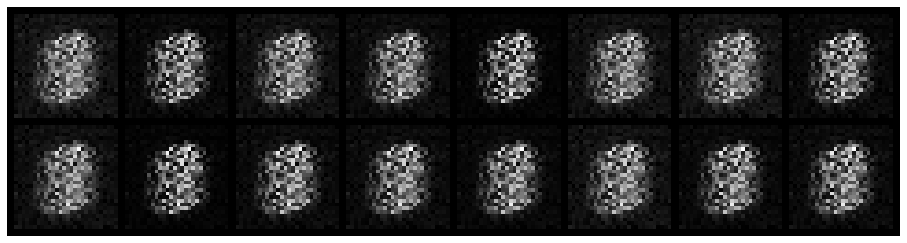

Epoch: [1/200], Batch Num: [300/600]
Discriminator Loss: 0.7714, Generator Loss: 1.8339
D(x): 0.6821, D(G(z)): 0.2887


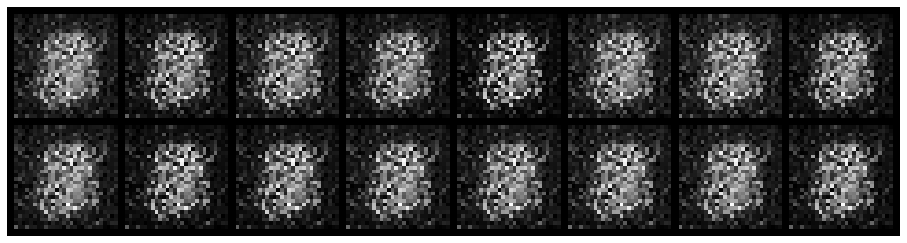

Epoch: [1/200], Batch Num: [400/600]
Discriminator Loss: 3.6001, Generator Loss: 0.9820
D(x): 0.4108, D(G(z)): 0.8110


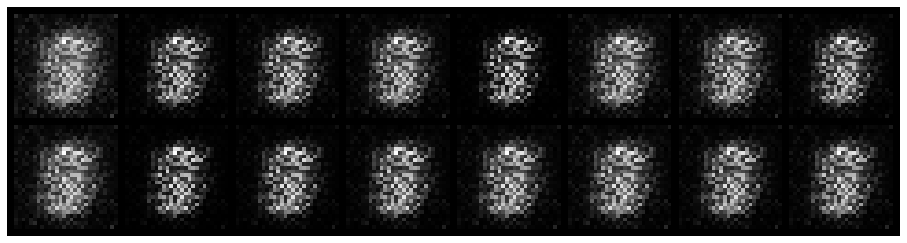

Epoch: [1/200], Batch Num: [500/600]
Discriminator Loss: 0.9219, Generator Loss: 1.0811
D(x): 0.6712, D(G(z)): 0.3767


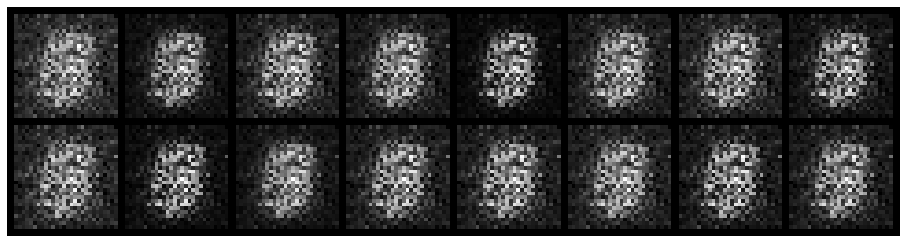

Epoch: [2/200], Batch Num: [0/600]
Discriminator Loss: 0.9875, Generator Loss: 1.5086
D(x): 0.5717, D(G(z)): 0.3294


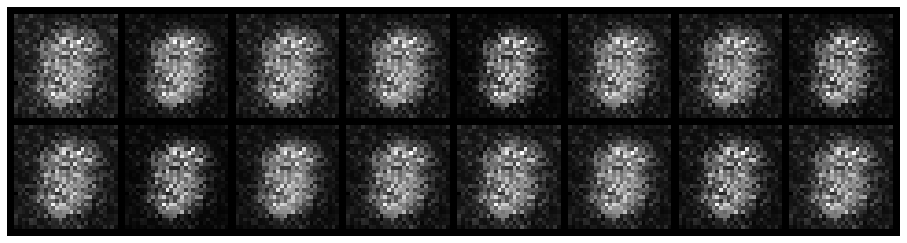

Epoch: [2/200], Batch Num: [100/600]
Discriminator Loss: 1.1774, Generator Loss: 0.6913
D(x): 0.6452, D(G(z)): 0.5145


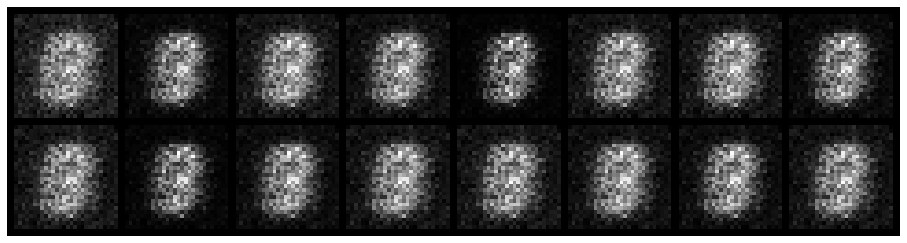

Epoch: [2/200], Batch Num: [200/600]
Discriminator Loss: 0.9698, Generator Loss: 1.2439
D(x): 0.6745, D(G(z)): 0.3738


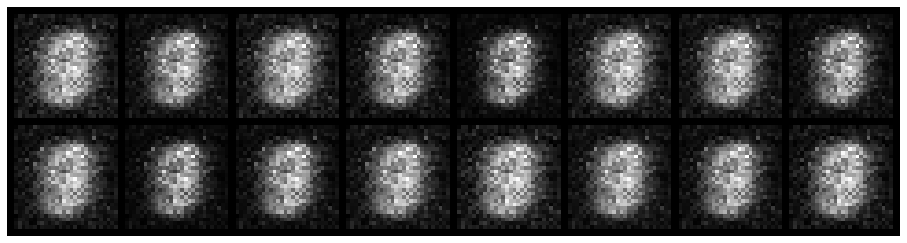

Epoch: [2/200], Batch Num: [300/600]
Discriminator Loss: 0.5290, Generator Loss: 3.3969
D(x): 0.8244, D(G(z)): 0.1727


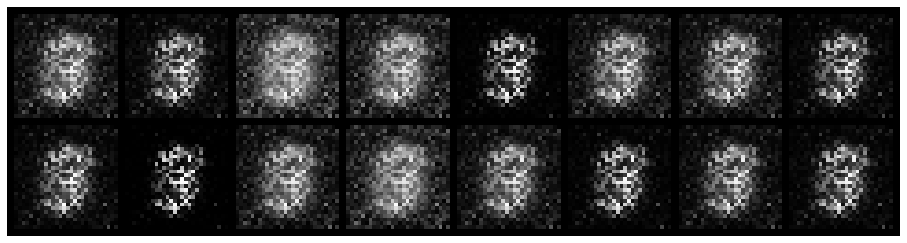

Epoch: [2/200], Batch Num: [400/600]
Discriminator Loss: 0.4994, Generator Loss: 2.1113
D(x): 0.7992, D(G(z)): 0.1898


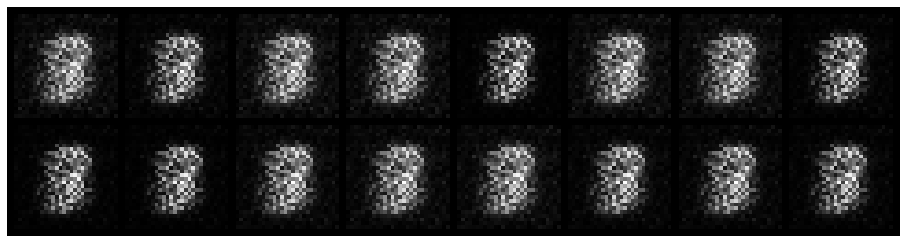

Epoch: [2/200], Batch Num: [500/600]
Discriminator Loss: 0.2073, Generator Loss: 3.2849
D(x): 0.8985, D(G(z)): 0.0742


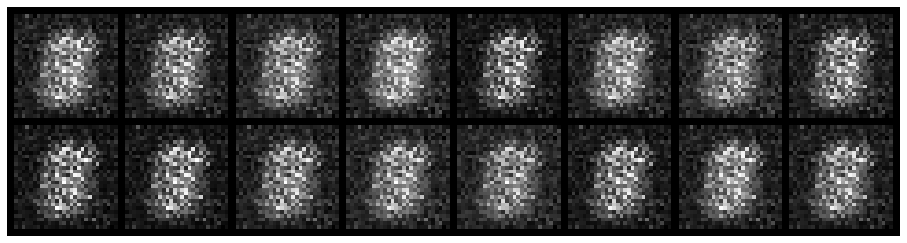

Epoch: [3/200], Batch Num: [0/600]
Discriminator Loss: 1.2036, Generator Loss: 5.2210
D(x): 0.8387, D(G(z)): 0.3632


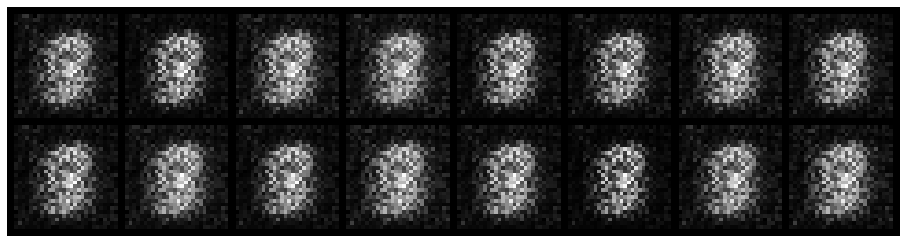

Epoch: [3/200], Batch Num: [100/600]
Discriminator Loss: 0.4654, Generator Loss: 2.5433
D(x): 0.8541, D(G(z)): 0.1562


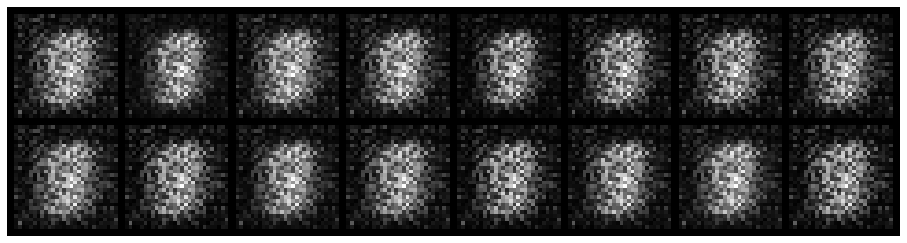

Epoch: [3/200], Batch Num: [200/600]
Discriminator Loss: 0.1327, Generator Loss: 3.8822
D(x): 0.9391, D(G(z)): 0.0508


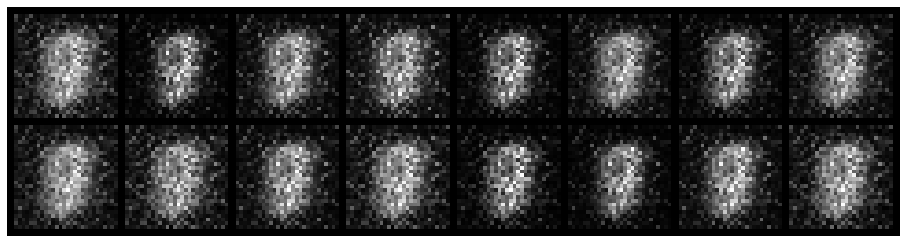

Epoch: [3/200], Batch Num: [300/600]
Discriminator Loss: 0.1859, Generator Loss: 3.0251
D(x): 0.9397, D(G(z)): 0.0921


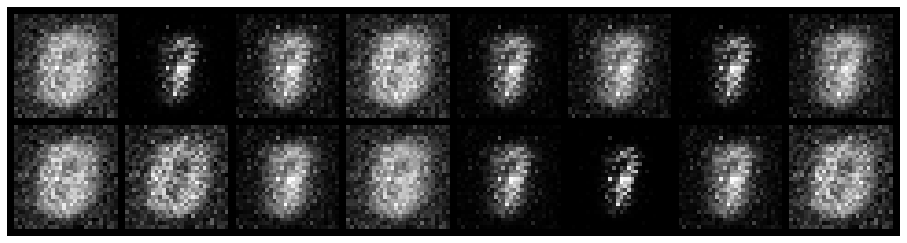

Epoch: [3/200], Batch Num: [400/600]
Discriminator Loss: 0.6207, Generator Loss: 2.5557
D(x): 0.8503, D(G(z)): 0.2012


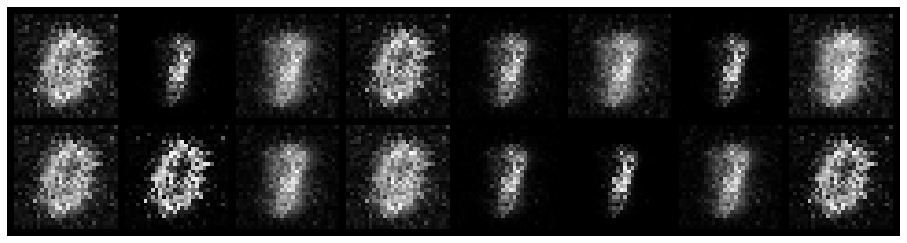

Epoch: [3/200], Batch Num: [500/600]
Discriminator Loss: 0.4716, Generator Loss: 2.4607
D(x): 0.8364, D(G(z)): 0.1816


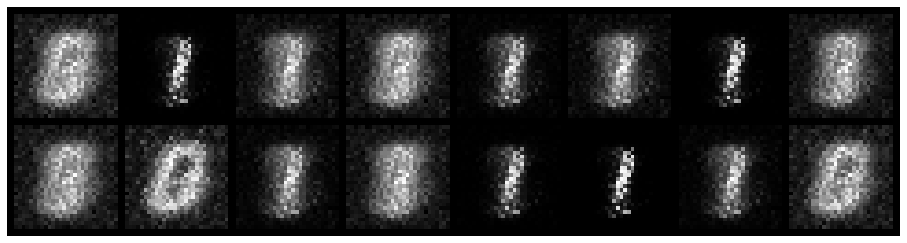

Epoch: [4/200], Batch Num: [0/600]
Discriminator Loss: 0.4994, Generator Loss: 2.6962
D(x): 0.8447, D(G(z)): 0.1191


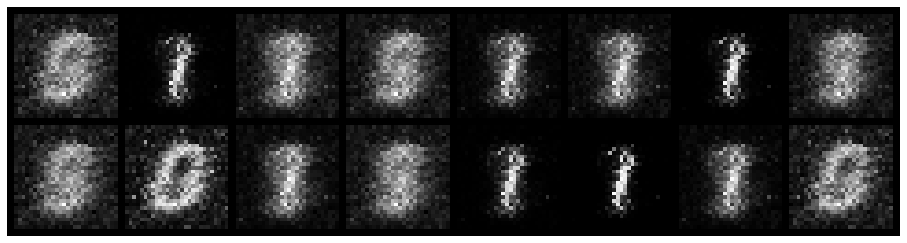

Epoch: [4/200], Batch Num: [100/600]
Discriminator Loss: 0.2191, Generator Loss: 3.2471
D(x): 0.9274, D(G(z)): 0.1018


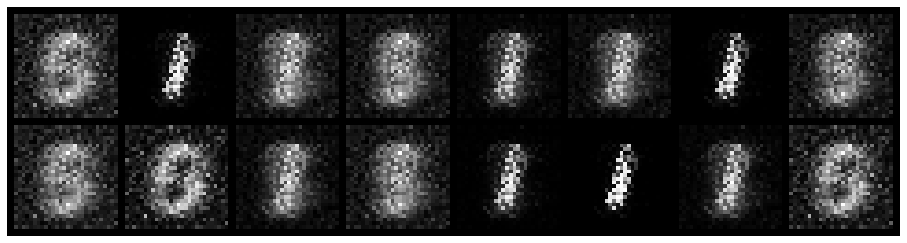

Epoch: [4/200], Batch Num: [200/600]
Discriminator Loss: 0.2544, Generator Loss: 4.7120
D(x): 0.9082, D(G(z)): 0.0551


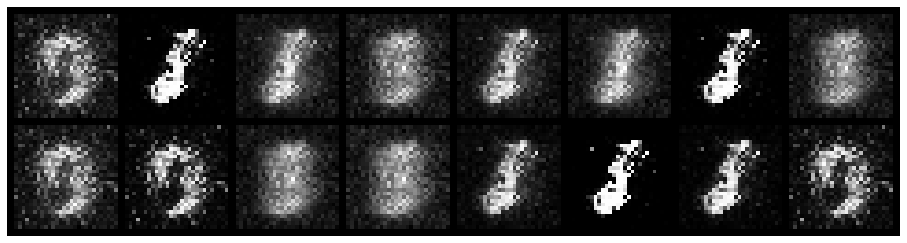

Epoch: [4/200], Batch Num: [300/600]
Discriminator Loss: 0.2963, Generator Loss: 3.1148
D(x): 0.9020, D(G(z)): 0.1223


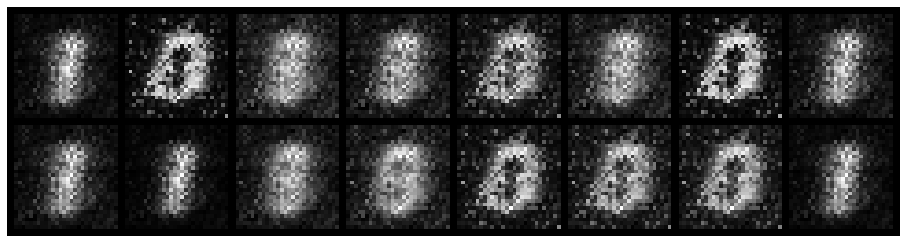

Epoch: [4/200], Batch Num: [400/600]
Discriminator Loss: 0.7801, Generator Loss: 2.2867
D(x): 0.7976, D(G(z)): 0.2963


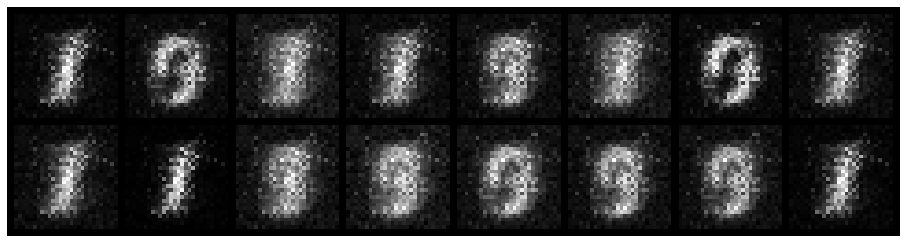

Epoch: [4/200], Batch Num: [500/600]
Discriminator Loss: 0.2115, Generator Loss: 5.3713
D(x): 0.9238, D(G(z)): 0.0660


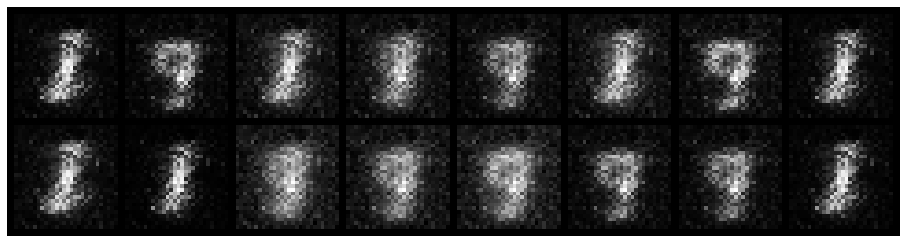

Epoch: [5/200], Batch Num: [0/600]
Discriminator Loss: 0.4732, Generator Loss: 1.8459
D(x): 0.8983, D(G(z)): 0.1997


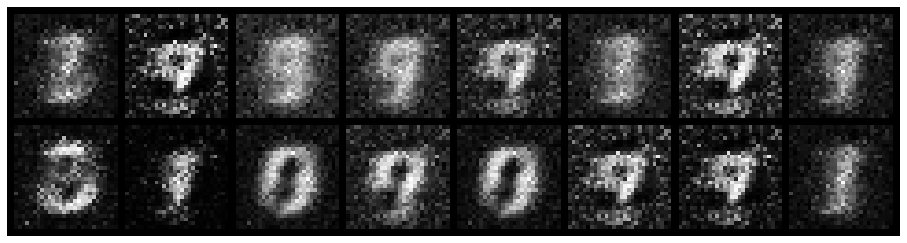

Epoch: [5/200], Batch Num: [100/600]
Discriminator Loss: 0.5620, Generator Loss: 2.5083
D(x): 0.8644, D(G(z)): 0.2268


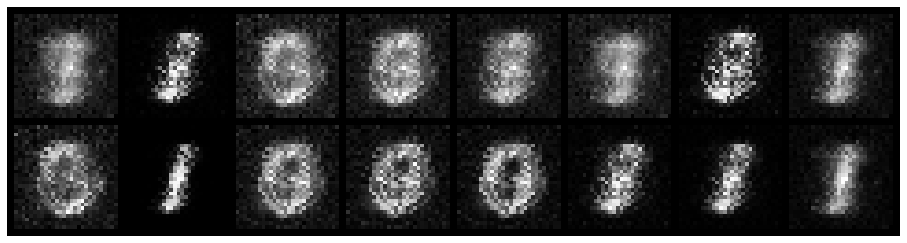

Epoch: [5/200], Batch Num: [200/600]
Discriminator Loss: 0.8301, Generator Loss: 2.2070
D(x): 0.7161, D(G(z)): 0.1388


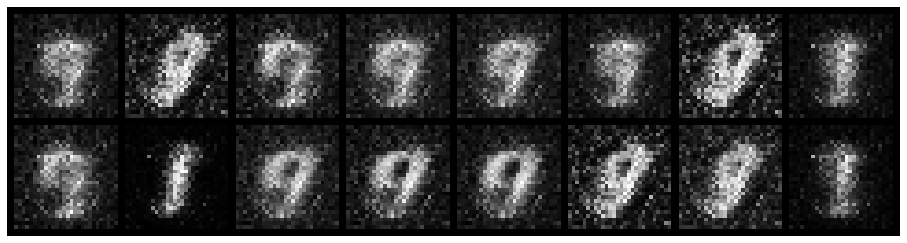

Epoch: [5/200], Batch Num: [300/600]
Discriminator Loss: 0.3781, Generator Loss: 4.2491
D(x): 0.8881, D(G(z)): 0.1521


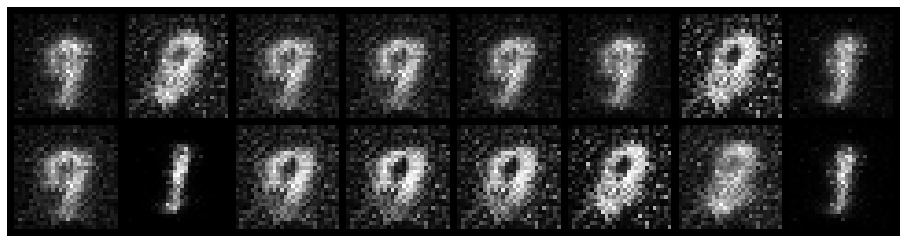

Epoch: [5/200], Batch Num: [400/600]
Discriminator Loss: 0.3287, Generator Loss: 3.2451
D(x): 0.8970, D(G(z)): 0.1311


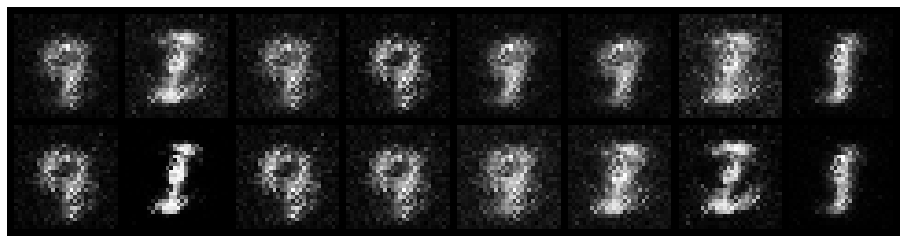

Epoch: [5/200], Batch Num: [500/600]
Discriminator Loss: 0.5756, Generator Loss: 2.8200
D(x): 0.8812, D(G(z)): 0.2304


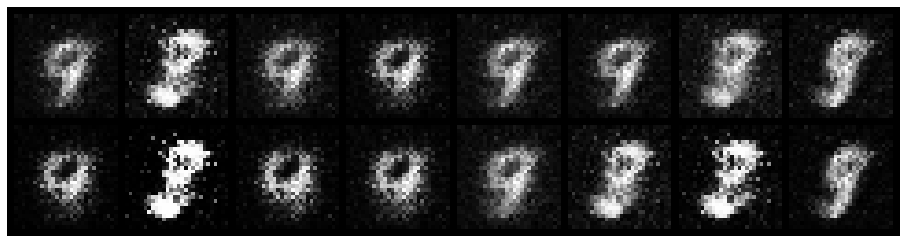

Epoch: [6/200], Batch Num: [0/600]
Discriminator Loss: 0.3350, Generator Loss: 2.1086
D(x): 0.9099, D(G(z)): 0.1714


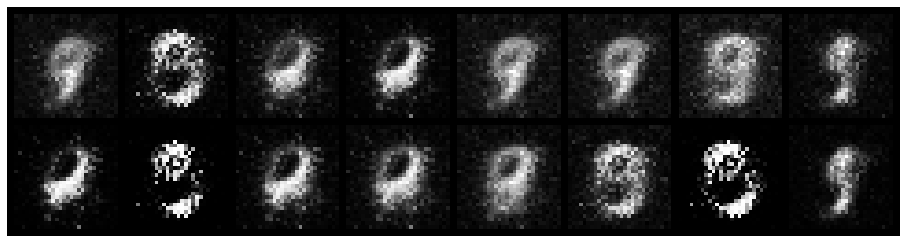

Epoch: [6/200], Batch Num: [100/600]
Discriminator Loss: 0.7621, Generator Loss: 2.7184
D(x): 0.7893, D(G(z)): 0.1686


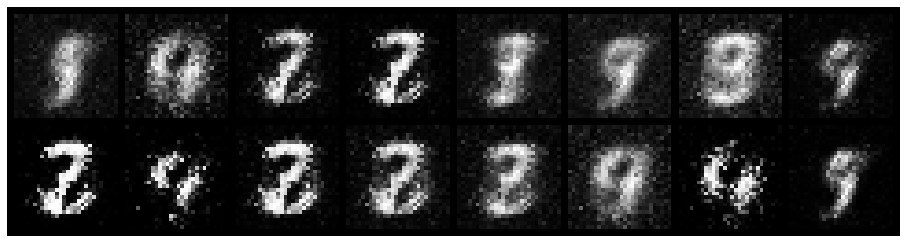

Epoch: [6/200], Batch Num: [200/600]
Discriminator Loss: 1.2520, Generator Loss: 2.0115
D(x): 0.6557, D(G(z)): 0.2986


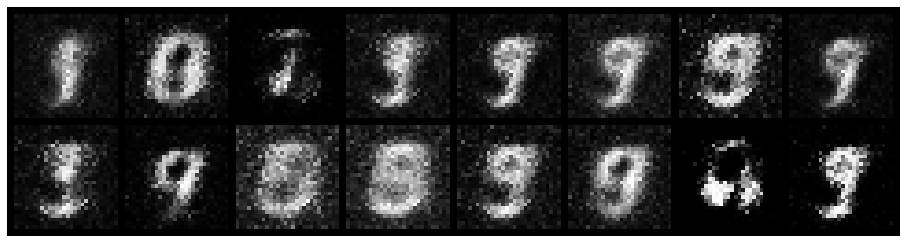

Epoch: [6/200], Batch Num: [300/600]
Discriminator Loss: 0.5809, Generator Loss: 2.7602
D(x): 0.8309, D(G(z)): 0.1893


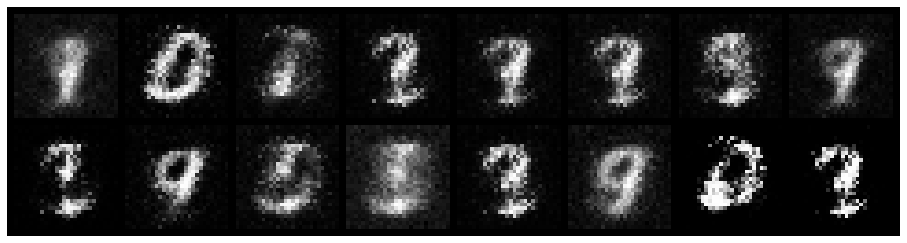

Epoch: [6/200], Batch Num: [400/600]
Discriminator Loss: 0.7491, Generator Loss: 1.7621
D(x): 0.8089, D(G(z)): 0.2646


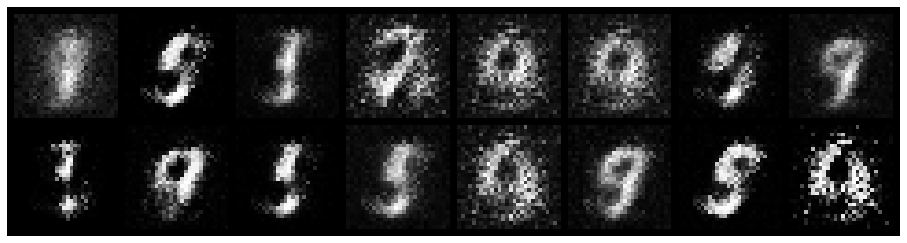

Epoch: [6/200], Batch Num: [500/600]
Discriminator Loss: 0.4844, Generator Loss: 2.2932
D(x): 0.8400, D(G(z)): 0.1368


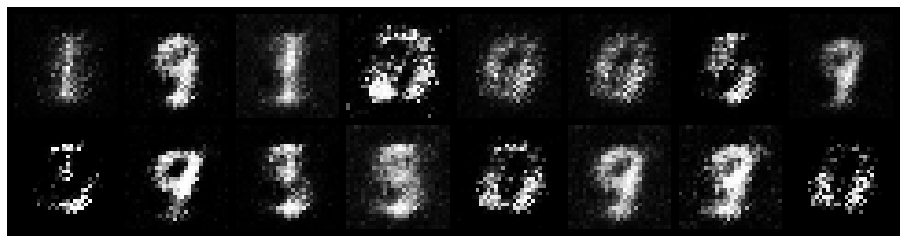

Epoch: [7/200], Batch Num: [0/600]
Discriminator Loss: 0.4714, Generator Loss: 2.6455
D(x): 0.8823, D(G(z)): 0.1991


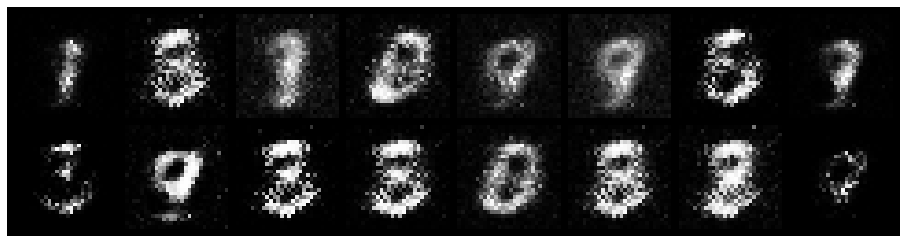

Epoch: [7/200], Batch Num: [100/600]
Discriminator Loss: 0.4683, Generator Loss: 2.6262
D(x): 0.8453, D(G(z)): 0.1481


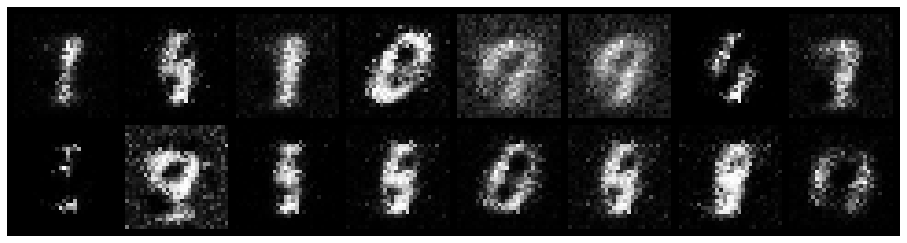

Epoch: [7/200], Batch Num: [200/600]
Discriminator Loss: 0.4075, Generator Loss: 3.4414
D(x): 0.8616, D(G(z)): 0.1125


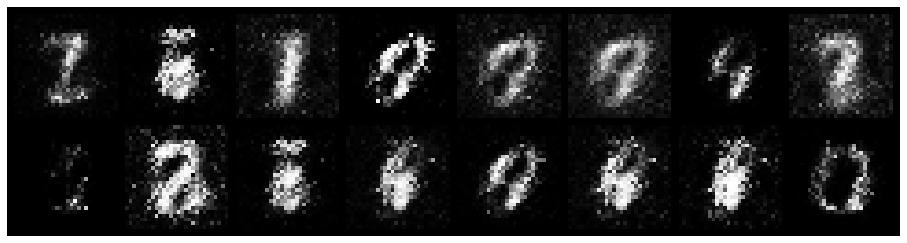

Epoch: [7/200], Batch Num: [300/600]
Discriminator Loss: 0.8344, Generator Loss: 3.0867
D(x): 0.7695, D(G(z)): 0.1588


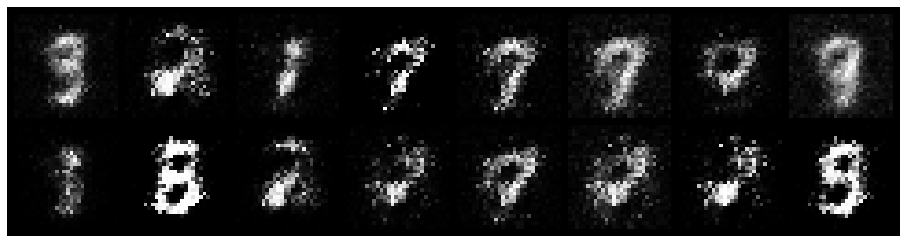

Epoch: [7/200], Batch Num: [400/600]
Discriminator Loss: 0.8486, Generator Loss: 3.0518
D(x): 0.6450, D(G(z)): 0.0806


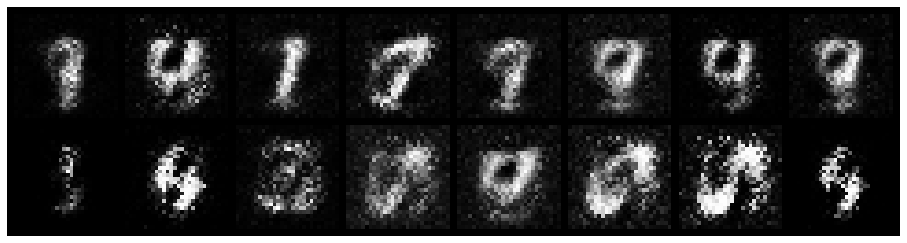

Epoch: [7/200], Batch Num: [500/600]
Discriminator Loss: 0.3413, Generator Loss: 3.5136
D(x): 0.8743, D(G(z)): 0.1024


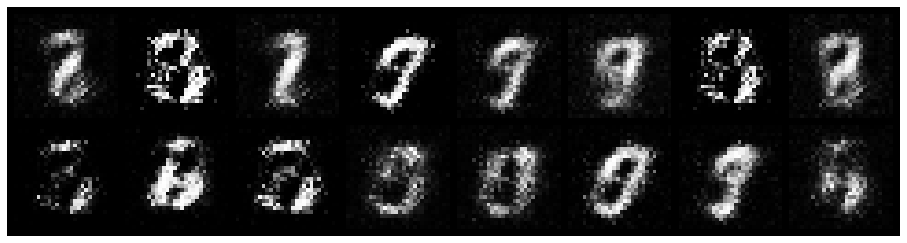

Epoch: [8/200], Batch Num: [0/600]
Discriminator Loss: 0.3023, Generator Loss: 3.6570
D(x): 0.8806, D(G(z)): 0.0856


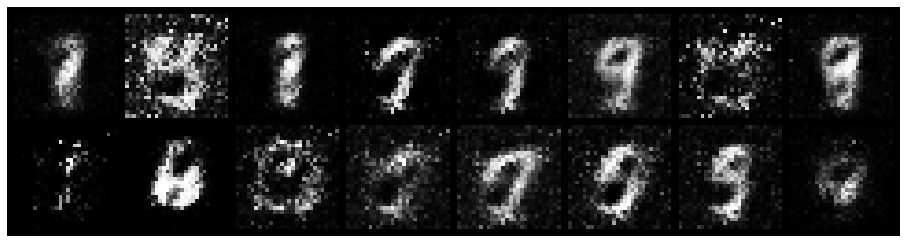

Epoch: [8/200], Batch Num: [100/600]
Discriminator Loss: 0.6147, Generator Loss: 2.1943
D(x): 0.8153, D(G(z)): 0.1899


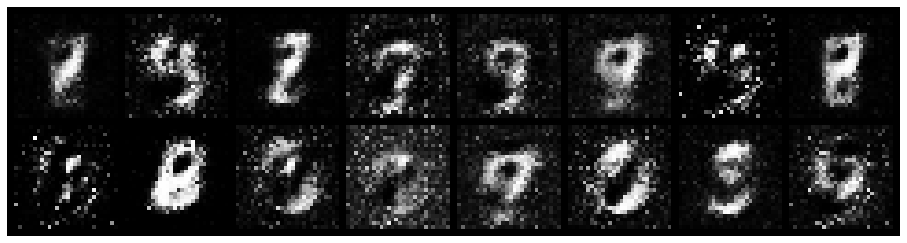

Epoch: [8/200], Batch Num: [200/600]
Discriminator Loss: 0.6461, Generator Loss: 3.0517
D(x): 0.8282, D(G(z)): 0.2121


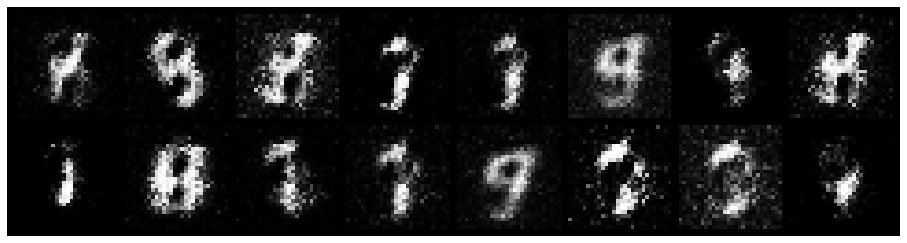

Epoch: [8/200], Batch Num: [300/600]
Discriminator Loss: 1.0517, Generator Loss: 2.4574
D(x): 0.6445, D(G(z)): 0.1604


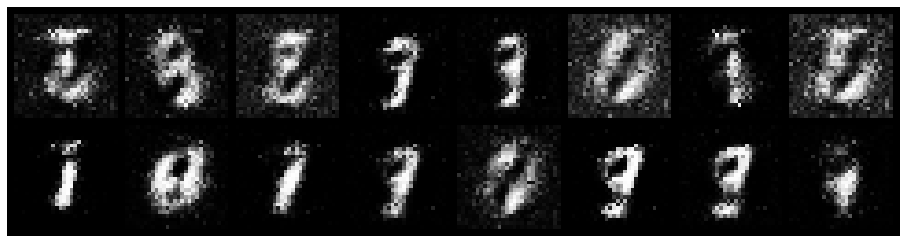

Epoch: [8/200], Batch Num: [400/600]
Discriminator Loss: 0.7996, Generator Loss: 1.9216
D(x): 0.8069, D(G(z)): 0.2855


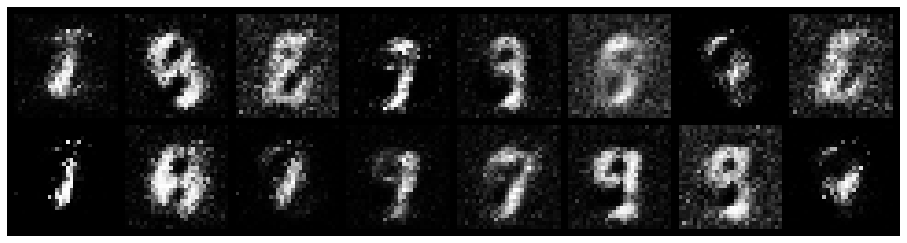

Epoch: [8/200], Batch Num: [500/600]
Discriminator Loss: 0.3071, Generator Loss: 3.6966
D(x): 0.8644, D(G(z)): 0.0640


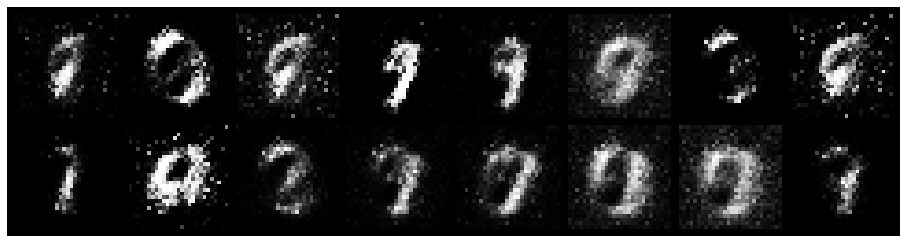

Epoch: [9/200], Batch Num: [0/600]
Discriminator Loss: 0.5703, Generator Loss: 2.7280
D(x): 0.8582, D(G(z)): 0.1931


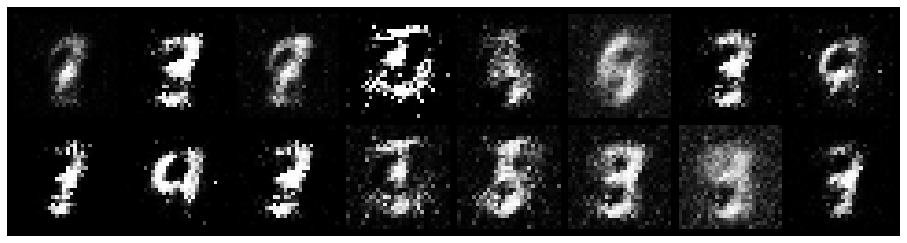

Epoch: [9/200], Batch Num: [100/600]
Discriminator Loss: 0.5273, Generator Loss: 3.2011
D(x): 0.8648, D(G(z)): 0.2086


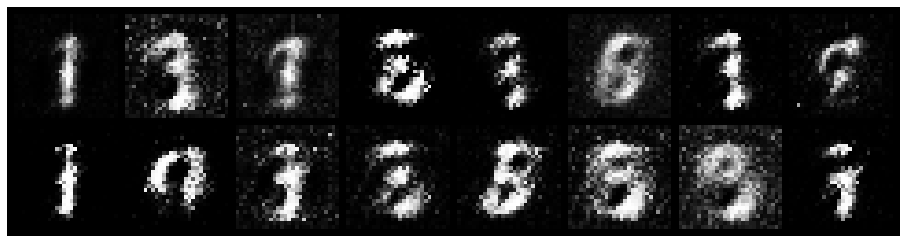

Epoch: [9/200], Batch Num: [200/600]
Discriminator Loss: 0.4267, Generator Loss: 2.7408
D(x): 0.8768, D(G(z)): 0.1691


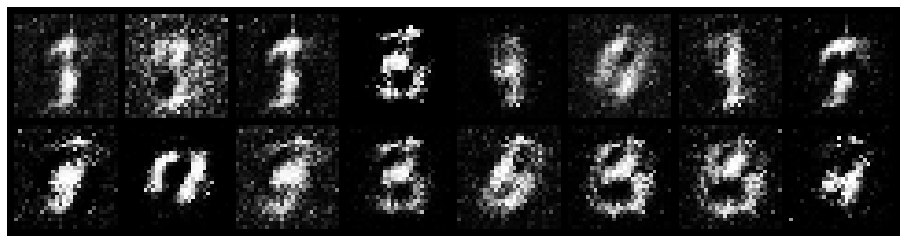

Epoch: [9/200], Batch Num: [300/600]
Discriminator Loss: 0.5190, Generator Loss: 2.3816
D(x): 0.8985, D(G(z)): 0.2481


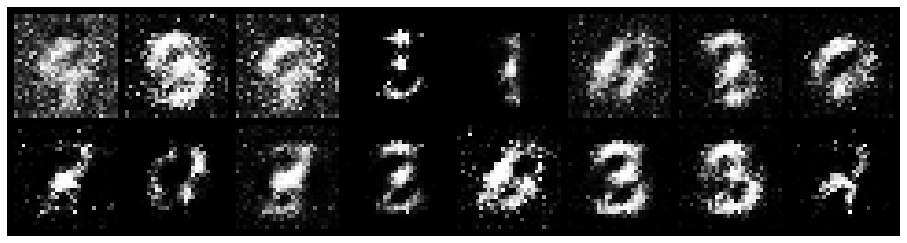

Epoch: [9/200], Batch Num: [400/600]
Discriminator Loss: 0.7640, Generator Loss: 2.2122
D(x): 0.7869, D(G(z)): 0.2343


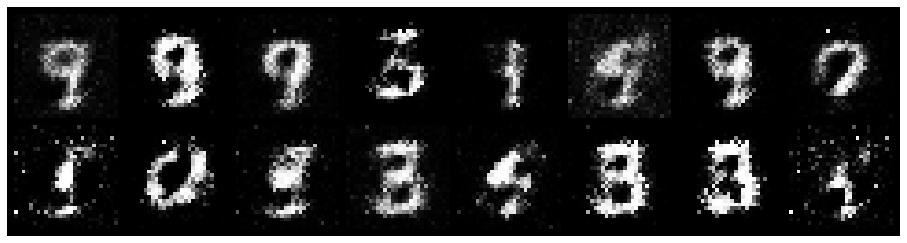

Epoch: [9/200], Batch Num: [500/600]
Discriminator Loss: 0.6643, Generator Loss: 2.5910
D(x): 0.7560, D(G(z)): 0.1246


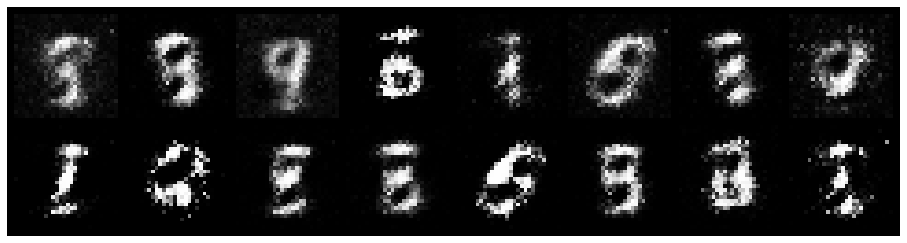

Epoch: [10/200], Batch Num: [0/600]
Discriminator Loss: 0.4211, Generator Loss: 3.5495
D(x): 0.8505, D(G(z)): 0.1356


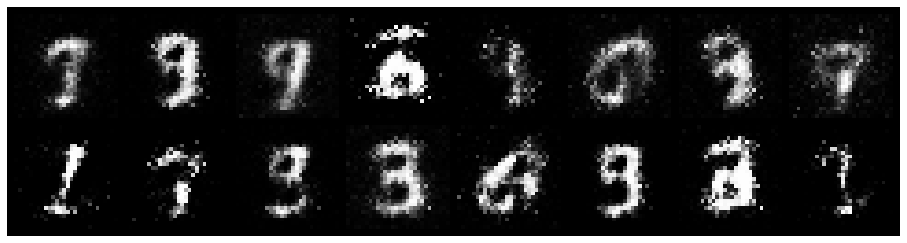

Epoch: [10/200], Batch Num: [100/600]
Discriminator Loss: 0.5452, Generator Loss: 2.6911
D(x): 0.7738, D(G(z)): 0.1234


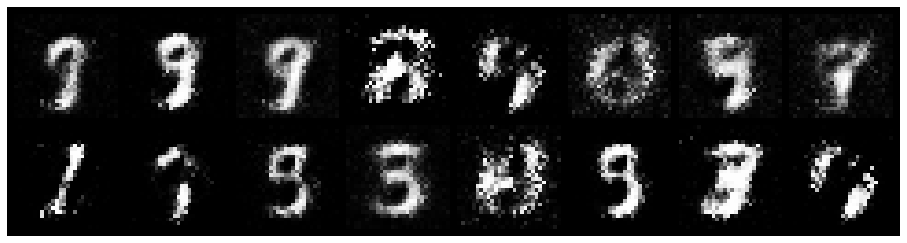

Epoch: [10/200], Batch Num: [200/600]
Discriminator Loss: 0.5287, Generator Loss: 2.7010
D(x): 0.8572, D(G(z)): 0.1902


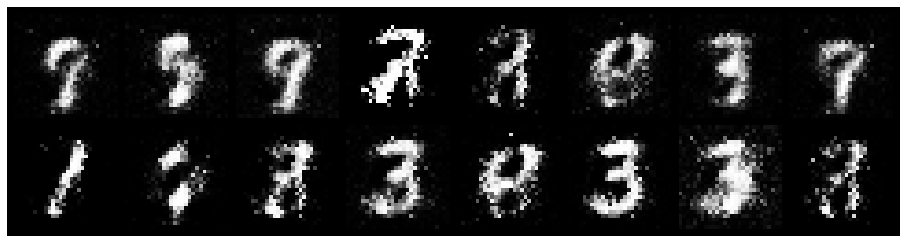

Epoch: [10/200], Batch Num: [300/600]
Discriminator Loss: 0.8842, Generator Loss: 1.7424
D(x): 0.7237, D(G(z)): 0.2367


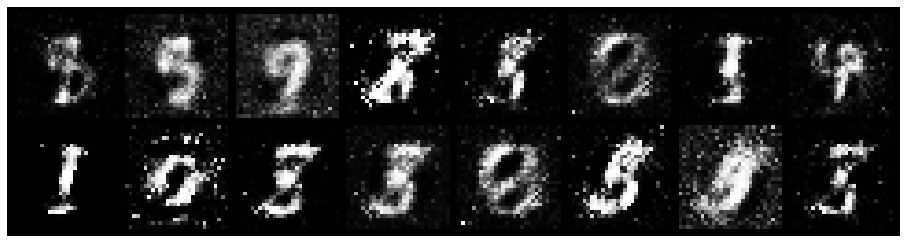

Epoch: [10/200], Batch Num: [400/600]
Discriminator Loss: 0.8987, Generator Loss: 1.4029
D(x): 0.7101, D(G(z)): 0.2725


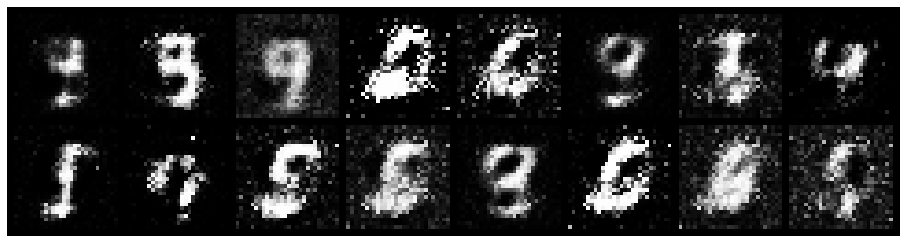

Epoch: [10/200], Batch Num: [500/600]
Discriminator Loss: 1.0186, Generator Loss: 1.7546
D(x): 0.5984, D(G(z)): 0.2191


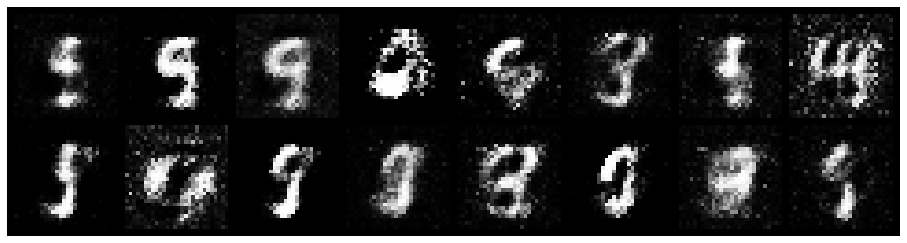

Epoch: [11/200], Batch Num: [0/600]
Discriminator Loss: 0.6518, Generator Loss: 1.8678
D(x): 0.8291, D(G(z)): 0.2562


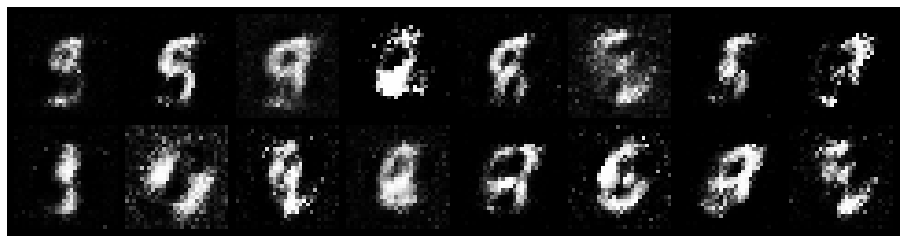

Epoch: [11/200], Batch Num: [100/600]
Discriminator Loss: 0.8277, Generator Loss: 2.0455
D(x): 0.7614, D(G(z)): 0.2929


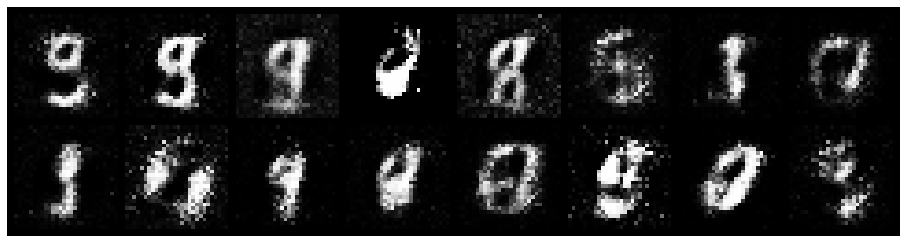

Epoch: [11/200], Batch Num: [200/600]
Discriminator Loss: 1.0518, Generator Loss: 1.7329
D(x): 0.7539, D(G(z)): 0.3842


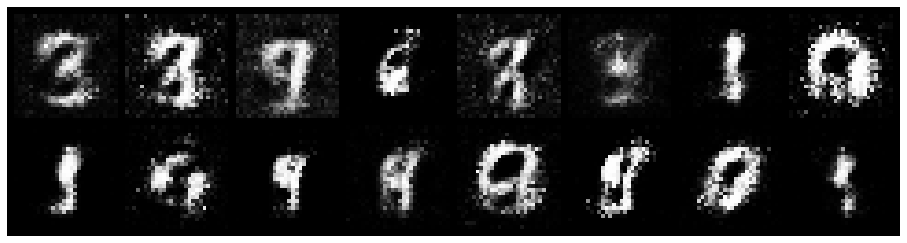

Epoch: [11/200], Batch Num: [300/600]
Discriminator Loss: 0.7193, Generator Loss: 1.8614
D(x): 0.7290, D(G(z)): 0.2438


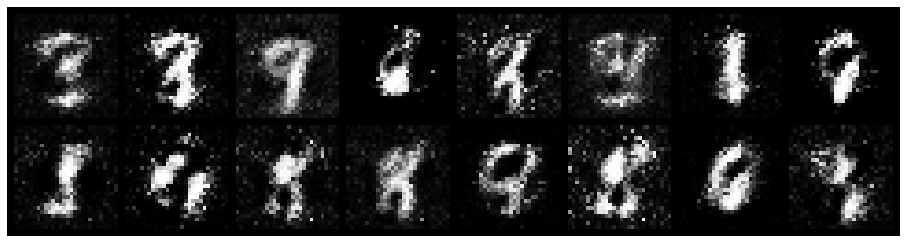

Epoch: [11/200], Batch Num: [400/600]
Discriminator Loss: 0.7177, Generator Loss: 1.7705
D(x): 0.7962, D(G(z)): 0.2692


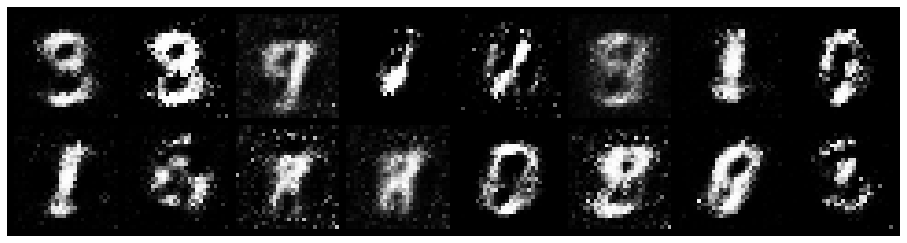

Epoch: [11/200], Batch Num: [500/600]
Discriminator Loss: 0.5899, Generator Loss: 2.6508
D(x): 0.8688, D(G(z)): 0.2368


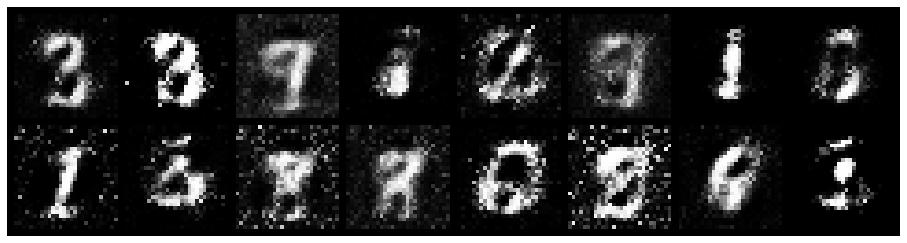

Epoch: [12/200], Batch Num: [0/600]
Discriminator Loss: 1.1473, Generator Loss: 1.8240
D(x): 0.8262, D(G(z)): 0.4209


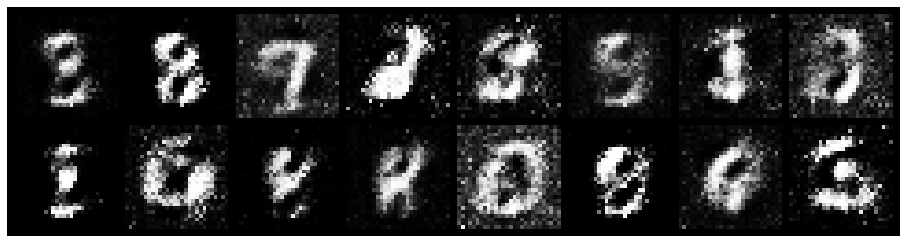

Epoch: [12/200], Batch Num: [100/600]
Discriminator Loss: 1.1355, Generator Loss: 1.9569
D(x): 0.7726, D(G(z)): 0.3778


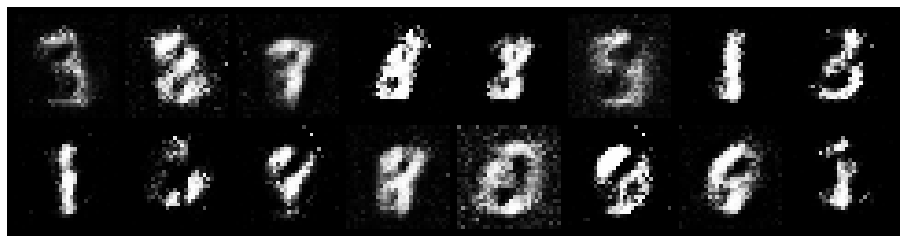

Epoch: [12/200], Batch Num: [200/600]
Discriminator Loss: 0.9473, Generator Loss: 1.6667
D(x): 0.7492, D(G(z)): 0.2780


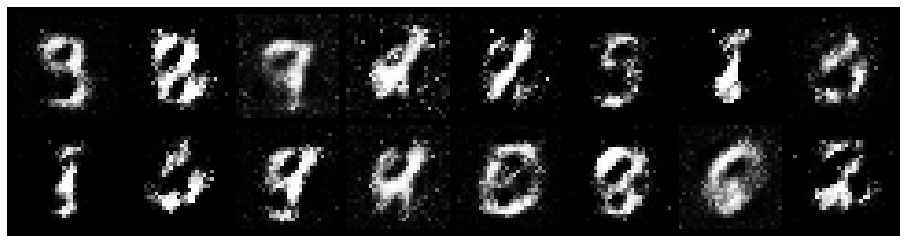

Epoch: [12/200], Batch Num: [300/600]
Discriminator Loss: 0.8994, Generator Loss: 1.7288
D(x): 0.7774, D(G(z)): 0.2953


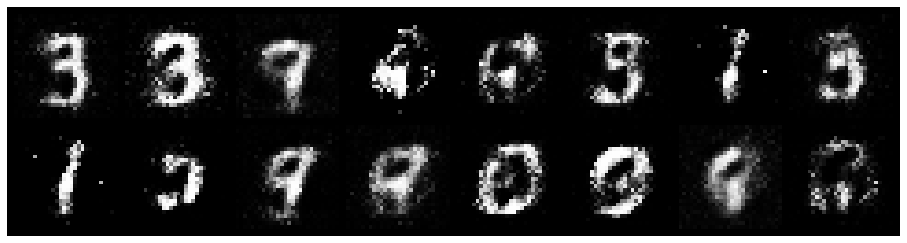

Epoch: [12/200], Batch Num: [400/600]
Discriminator Loss: 1.0997, Generator Loss: 1.5042
D(x): 0.6940, D(G(z)): 0.3274


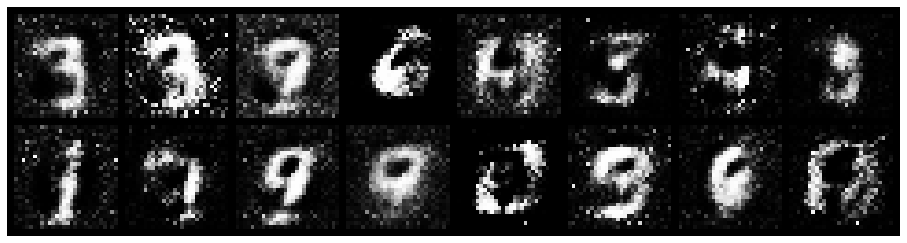

Epoch: [12/200], Batch Num: [500/600]
Discriminator Loss: 0.7978, Generator Loss: 1.5831
D(x): 0.7475, D(G(z)): 0.2740


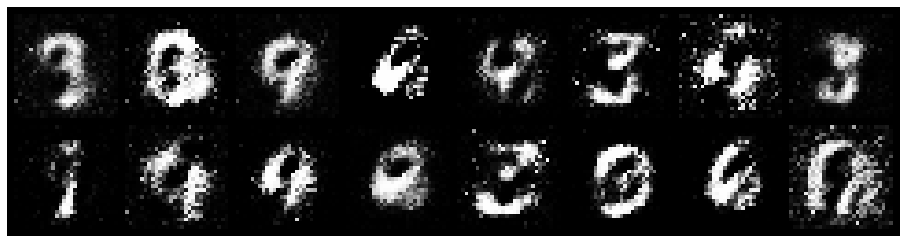

Epoch: [13/200], Batch Num: [0/600]
Discriminator Loss: 0.6611, Generator Loss: 2.3017
D(x): 0.7924, D(G(z)): 0.2294


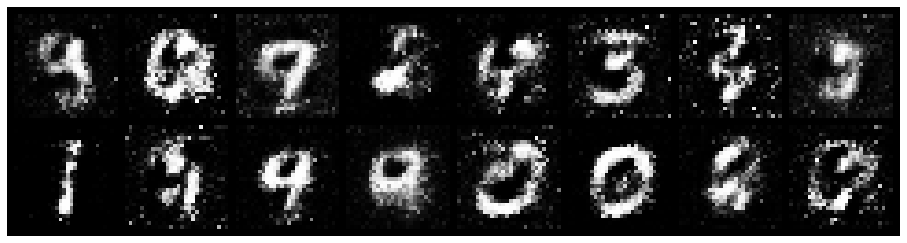

Epoch: [13/200], Batch Num: [100/600]
Discriminator Loss: 0.8721, Generator Loss: 1.7668
D(x): 0.6944, D(G(z)): 0.2318


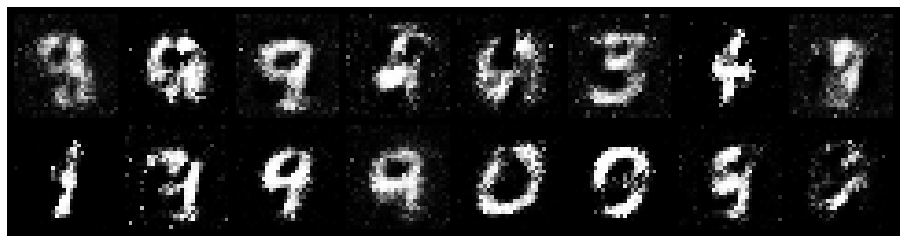

Epoch: [13/200], Batch Num: [200/600]
Discriminator Loss: 0.7781, Generator Loss: 2.5736
D(x): 0.8034, D(G(z)): 0.2552


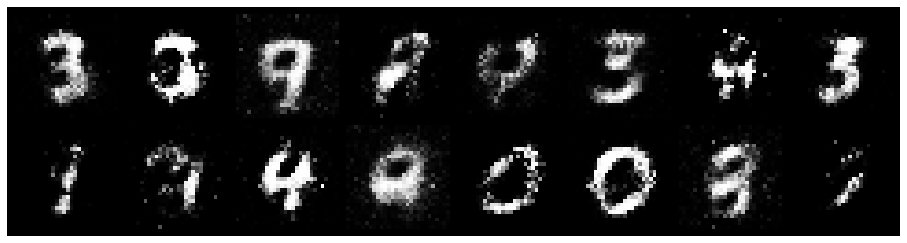

Epoch: [13/200], Batch Num: [300/600]
Discriminator Loss: 0.9862, Generator Loss: 1.3394
D(x): 0.7588, D(G(z)): 0.3864


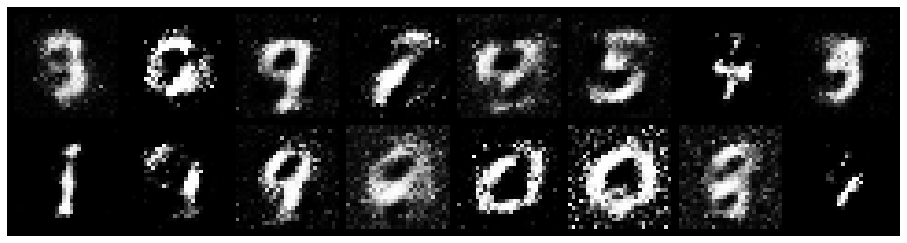

Epoch: [13/200], Batch Num: [400/600]
Discriminator Loss: 1.0055, Generator Loss: 1.8946
D(x): 0.7139, D(G(z)): 0.3021


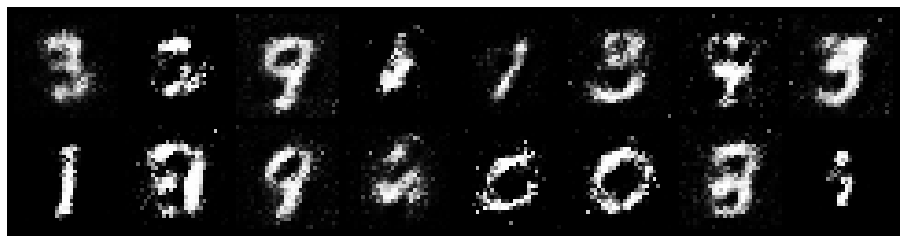

Epoch: [13/200], Batch Num: [500/600]
Discriminator Loss: 0.5727, Generator Loss: 2.3001
D(x): 0.7885, D(G(z)): 0.1892


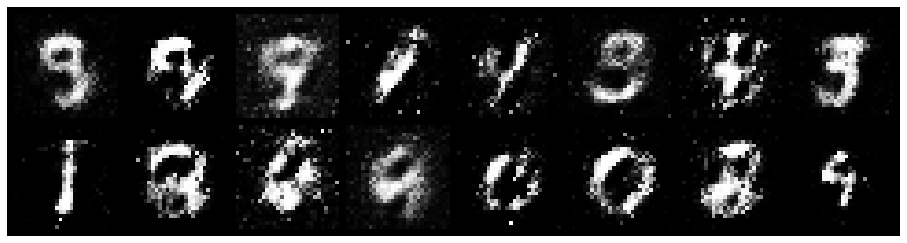

Epoch: [14/200], Batch Num: [0/600]
Discriminator Loss: 0.7220, Generator Loss: 1.6621
D(x): 0.7540, D(G(z)): 0.2299


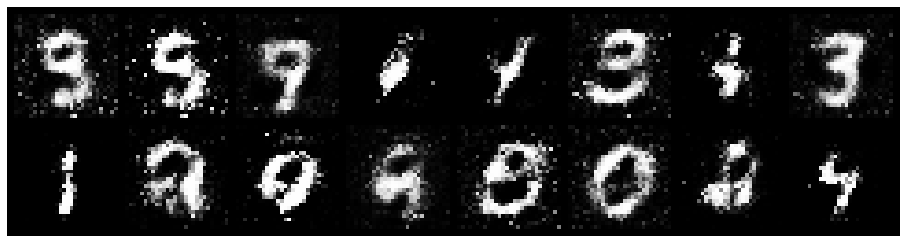

Epoch: [14/200], Batch Num: [100/600]
Discriminator Loss: 0.6725, Generator Loss: 1.9413
D(x): 0.7458, D(G(z)): 0.2241


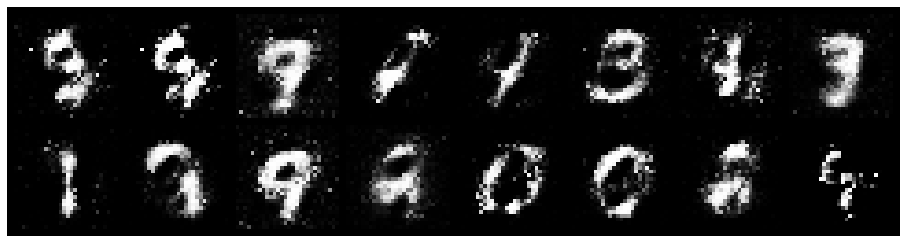

Epoch: [14/200], Batch Num: [200/600]
Discriminator Loss: 0.7729, Generator Loss: 2.4894
D(x): 0.7456, D(G(z)): 0.2151


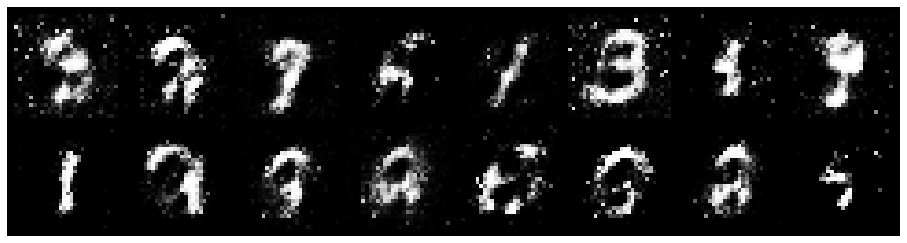

Epoch: [14/200], Batch Num: [300/600]
Discriminator Loss: 0.7055, Generator Loss: 1.9944
D(x): 0.7970, D(G(z)): 0.2315


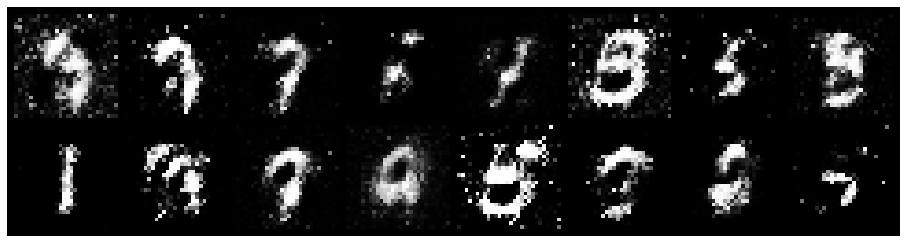

Epoch: [14/200], Batch Num: [400/600]
Discriminator Loss: 0.7090, Generator Loss: 2.4292
D(x): 0.8278, D(G(z)): 0.2363


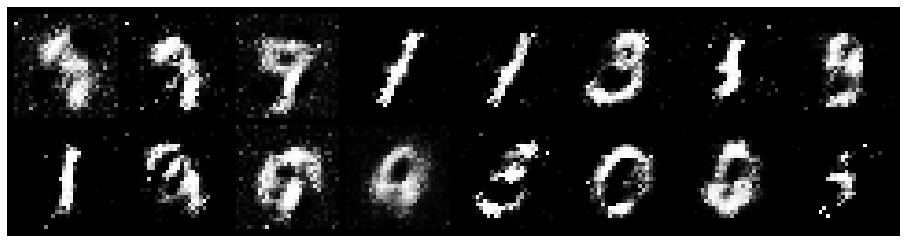

Epoch: [14/200], Batch Num: [500/600]
Discriminator Loss: 0.7954, Generator Loss: 1.8496
D(x): 0.7166, D(G(z)): 0.2199


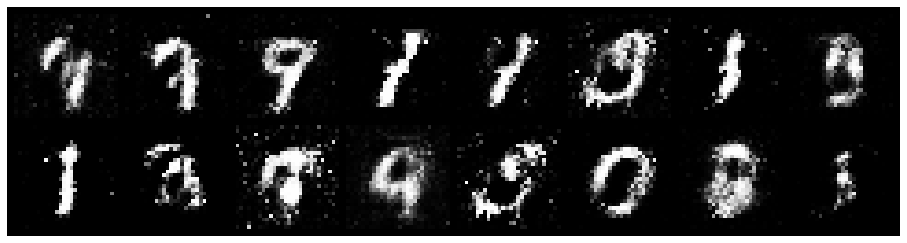

Epoch: [15/200], Batch Num: [0/600]
Discriminator Loss: 0.8374, Generator Loss: 1.6980
D(x): 0.7389, D(G(z)): 0.2731


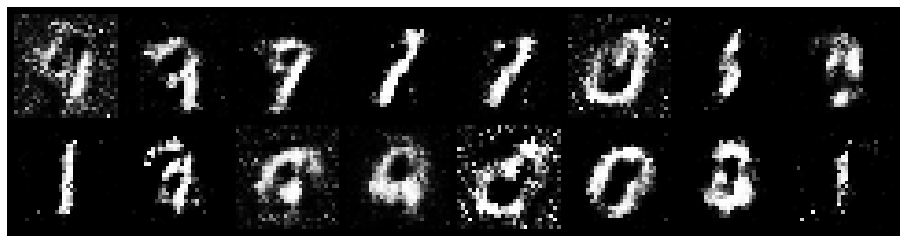

Epoch: [15/200], Batch Num: [100/600]
Discriminator Loss: 0.9431, Generator Loss: 1.5467
D(x): 0.6979, D(G(z)): 0.2979


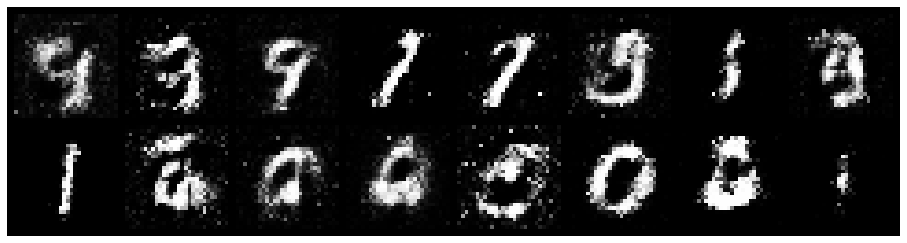

Epoch: [15/200], Batch Num: [200/600]
Discriminator Loss: 1.0633, Generator Loss: 1.5386
D(x): 0.7422, D(G(z)): 0.3558


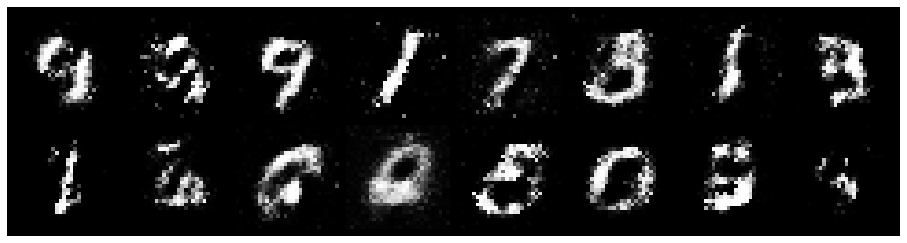

Epoch: [15/200], Batch Num: [300/600]
Discriminator Loss: 0.8962, Generator Loss: 1.9427
D(x): 0.6450, D(G(z)): 0.2277


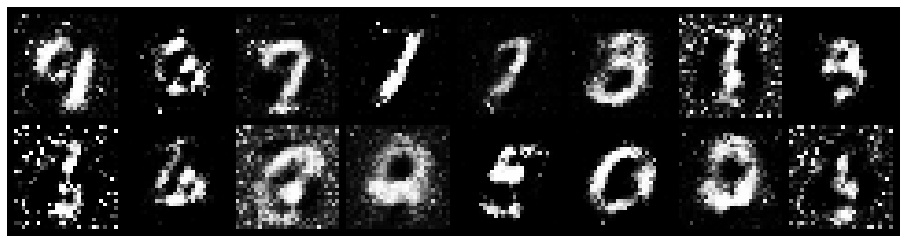

Epoch: [15/200], Batch Num: [400/600]
Discriminator Loss: 0.9167, Generator Loss: 1.7144
D(x): 0.6882, D(G(z)): 0.2561


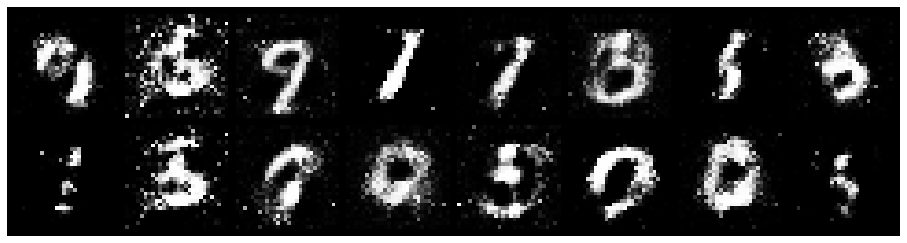

Epoch: [15/200], Batch Num: [500/600]
Discriminator Loss: 0.8410, Generator Loss: 1.3367
D(x): 0.7949, D(G(z)): 0.3645


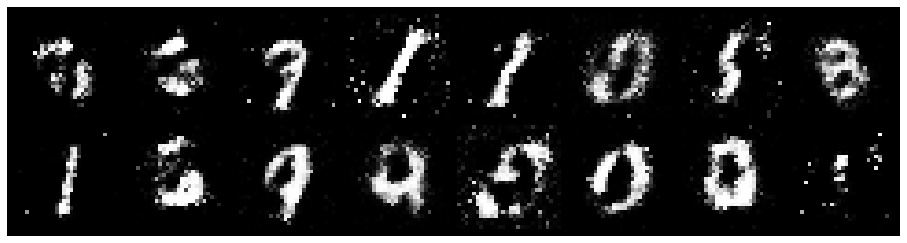

Epoch: [16/200], Batch Num: [0/600]
Discriminator Loss: 0.8295, Generator Loss: 1.3978
D(x): 0.7580, D(G(z)): 0.2876


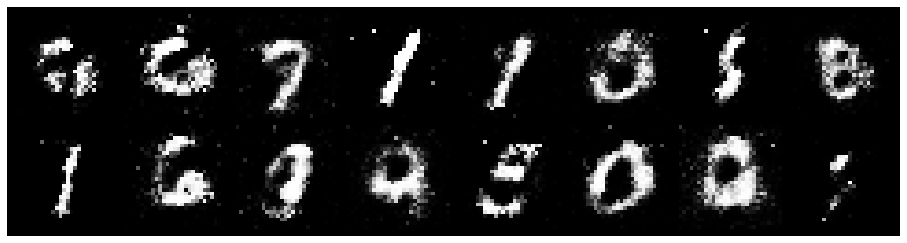

Epoch: [16/200], Batch Num: [100/600]
Discriminator Loss: 0.9805, Generator Loss: 1.4902
D(x): 0.7106, D(G(z)): 0.3444


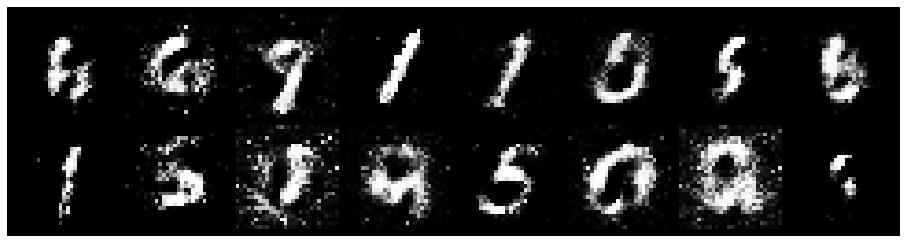

Epoch: [16/200], Batch Num: [200/600]
Discriminator Loss: 1.2316, Generator Loss: 1.5004
D(x): 0.6003, D(G(z)): 0.3295


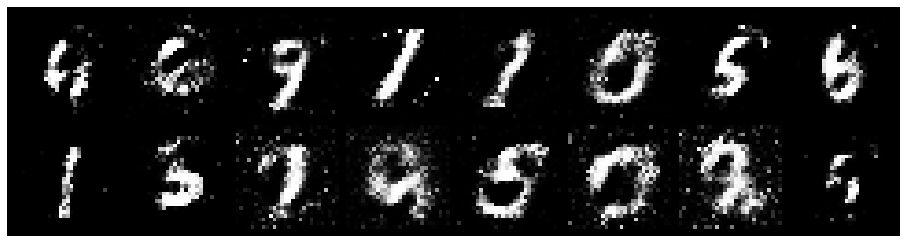

Epoch: [16/200], Batch Num: [300/600]
Discriminator Loss: 0.9698, Generator Loss: 1.5344
D(x): 0.6440, D(G(z)): 0.2314


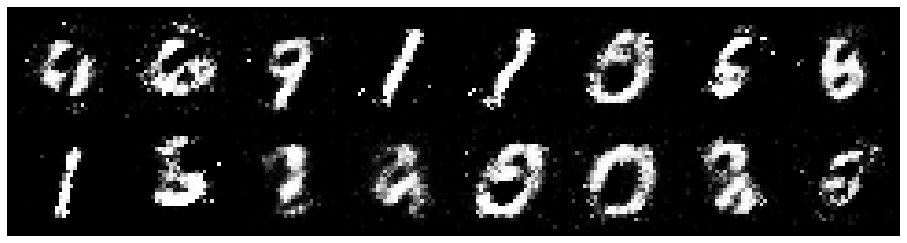

Epoch: [16/200], Batch Num: [400/600]
Discriminator Loss: 0.8209, Generator Loss: 2.1430
D(x): 0.7582, D(G(z)): 0.2863


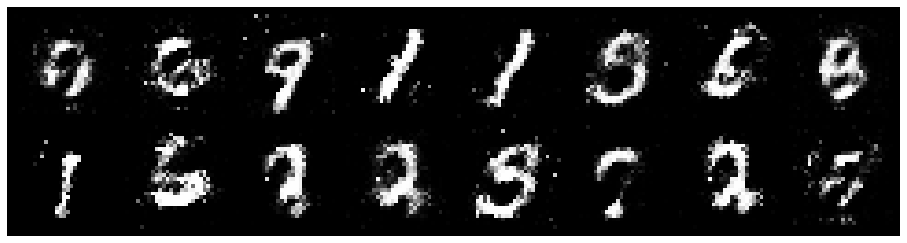

Epoch: [16/200], Batch Num: [500/600]
Discriminator Loss: 0.7535, Generator Loss: 2.0360
D(x): 0.7259, D(G(z)): 0.2063


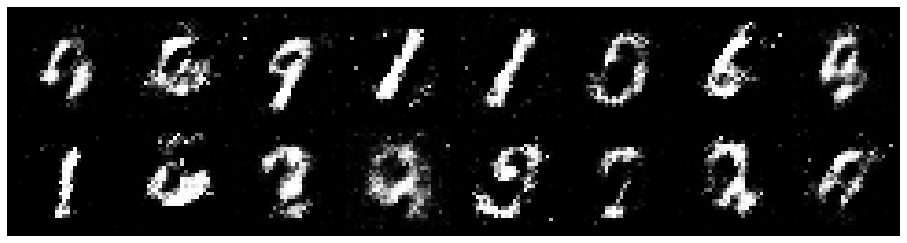

Epoch: [17/200], Batch Num: [0/600]
Discriminator Loss: 0.7658, Generator Loss: 1.6733
D(x): 0.7497, D(G(z)): 0.2581


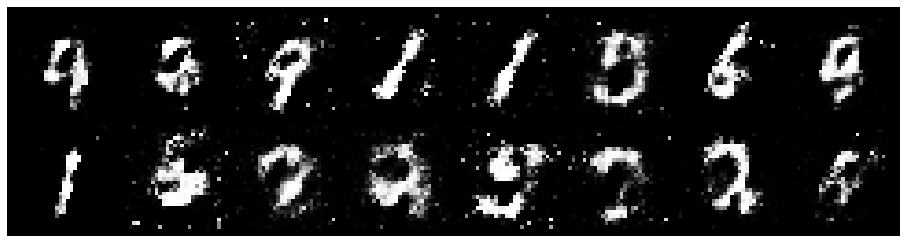

Epoch: [17/200], Batch Num: [100/600]
Discriminator Loss: 0.7911, Generator Loss: 1.9033
D(x): 0.7251, D(G(z)): 0.2339


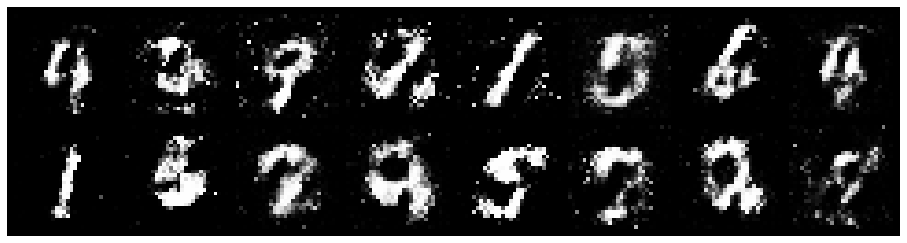

Epoch: [17/200], Batch Num: [200/600]
Discriminator Loss: 0.9206, Generator Loss: 1.8117
D(x): 0.7164, D(G(z)): 0.2731


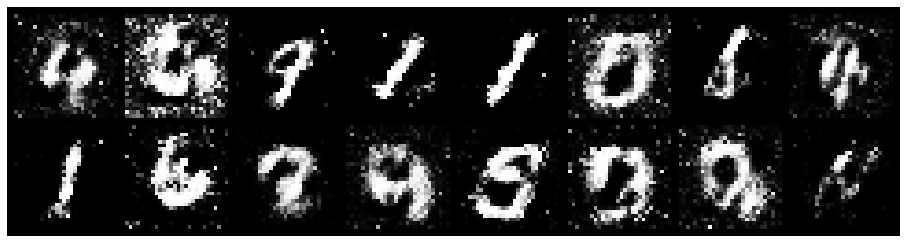

Epoch: [17/200], Batch Num: [300/600]
Discriminator Loss: 1.1499, Generator Loss: 1.1589
D(x): 0.5980, D(G(z)): 0.2937


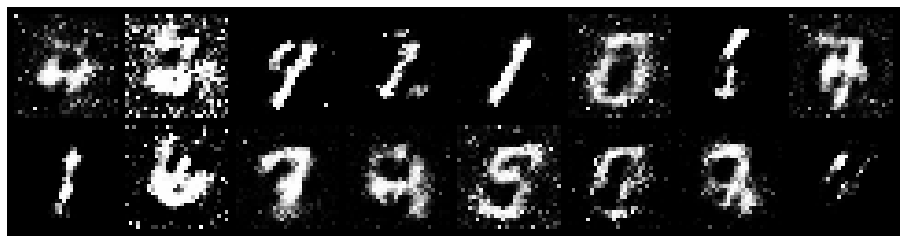

Epoch: [17/200], Batch Num: [400/600]
Discriminator Loss: 0.9920, Generator Loss: 1.7458
D(x): 0.7474, D(G(z)): 0.3424


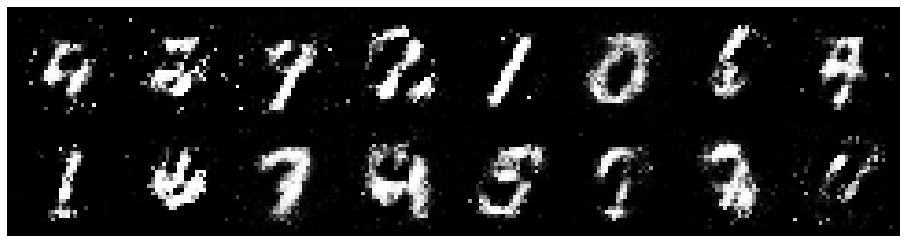

Epoch: [17/200], Batch Num: [500/600]
Discriminator Loss: 0.5504, Generator Loss: 2.1313
D(x): 0.7937, D(G(z)): 0.1834


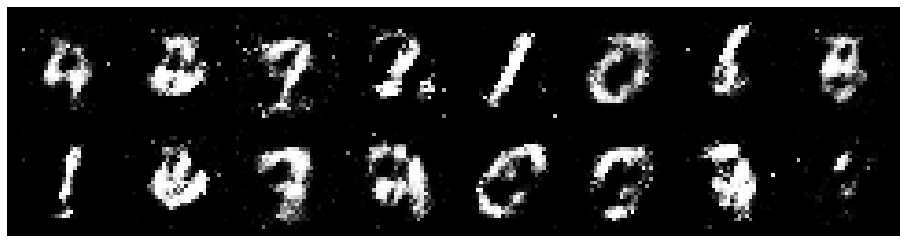

Epoch: [18/200], Batch Num: [0/600]
Discriminator Loss: 0.7309, Generator Loss: 1.5140
D(x): 0.7729, D(G(z)): 0.2612


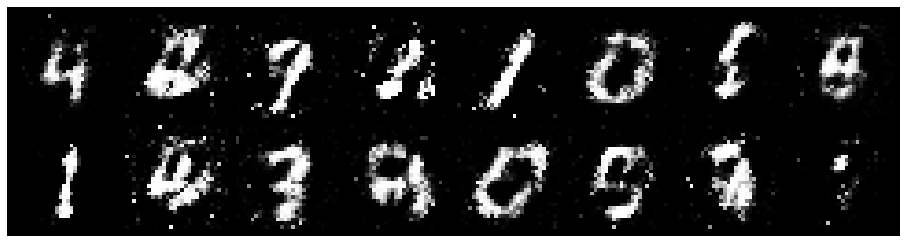

Epoch: [18/200], Batch Num: [100/600]
Discriminator Loss: 0.7833, Generator Loss: 2.3360
D(x): 0.7131, D(G(z)): 0.2154


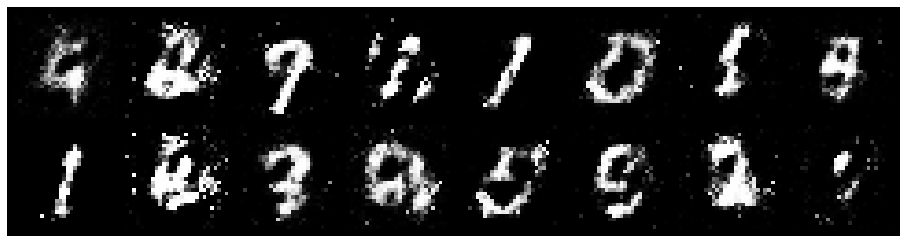

Epoch: [18/200], Batch Num: [200/600]
Discriminator Loss: 0.6952, Generator Loss: 1.9854
D(x): 0.7384, D(G(z)): 0.1922


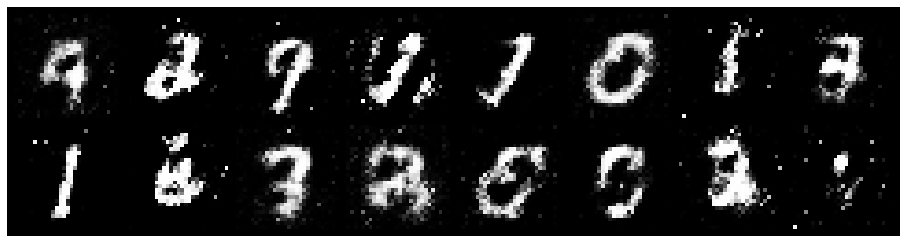

Epoch: [18/200], Batch Num: [300/600]
Discriminator Loss: 0.9790, Generator Loss: 1.6064
D(x): 0.6733, D(G(z)): 0.2644


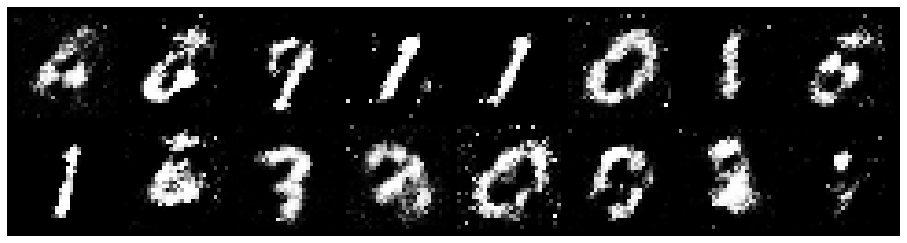

Epoch: [18/200], Batch Num: [400/600]
Discriminator Loss: 0.9976, Generator Loss: 1.4873
D(x): 0.6679, D(G(z)): 0.2679


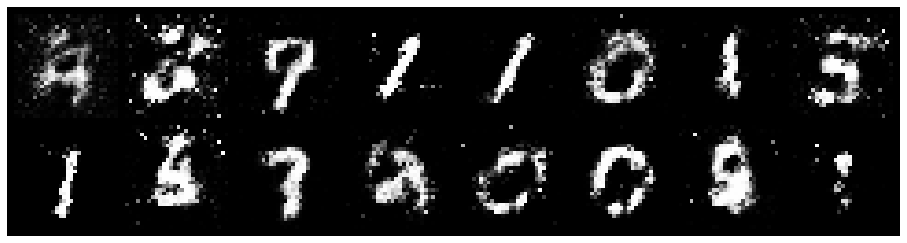

Epoch: [18/200], Batch Num: [500/600]
Discriminator Loss: 0.6958, Generator Loss: 1.6201
D(x): 0.7250, D(G(z)): 0.2340


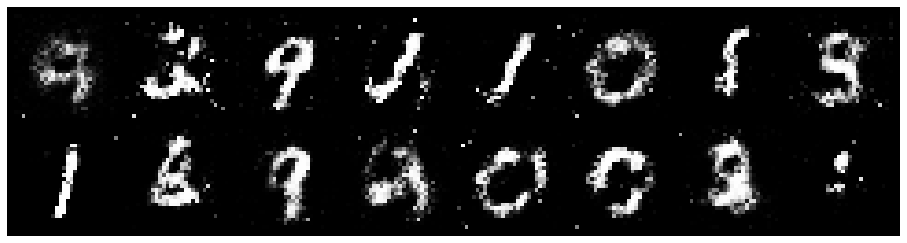

Epoch: [19/200], Batch Num: [0/600]
Discriminator Loss: 0.7088, Generator Loss: 1.7421
D(x): 0.7372, D(G(z)): 0.2322


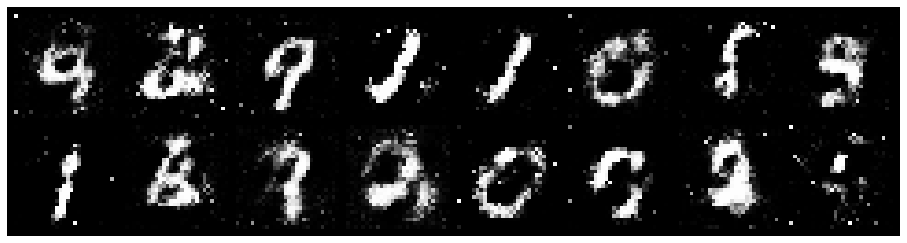

Epoch: [19/200], Batch Num: [100/600]
Discriminator Loss: 0.9960, Generator Loss: 1.7471
D(x): 0.7262, D(G(z)): 0.3268


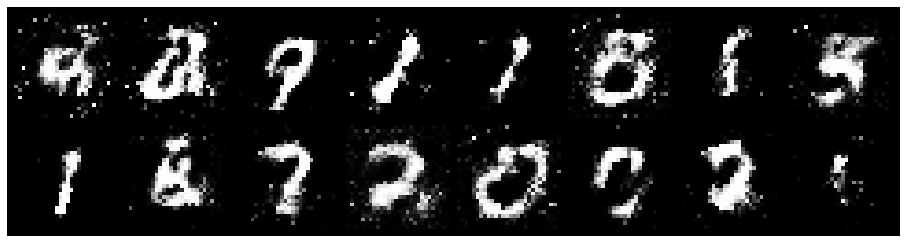

Epoch: [19/200], Batch Num: [200/600]
Discriminator Loss: 1.0693, Generator Loss: 1.4487
D(x): 0.7023, D(G(z)): 0.3783


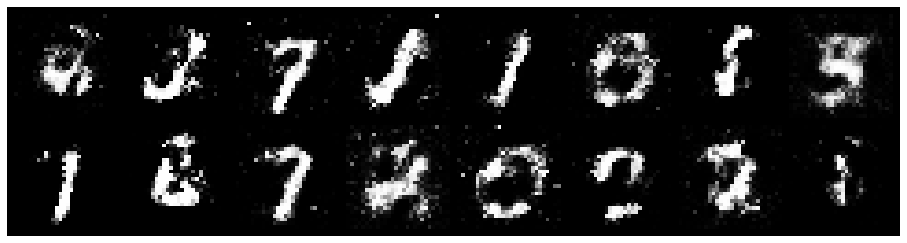

Epoch: [19/200], Batch Num: [300/600]
Discriminator Loss: 1.0633, Generator Loss: 1.5993
D(x): 0.6927, D(G(z)): 0.3318


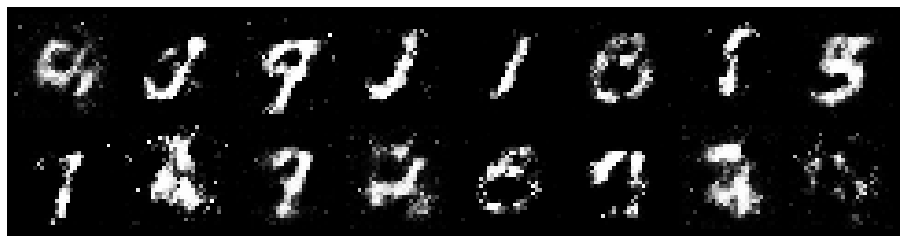

Epoch: [19/200], Batch Num: [400/600]
Discriminator Loss: 0.7873, Generator Loss: 1.2576
D(x): 0.7456, D(G(z)): 0.2918


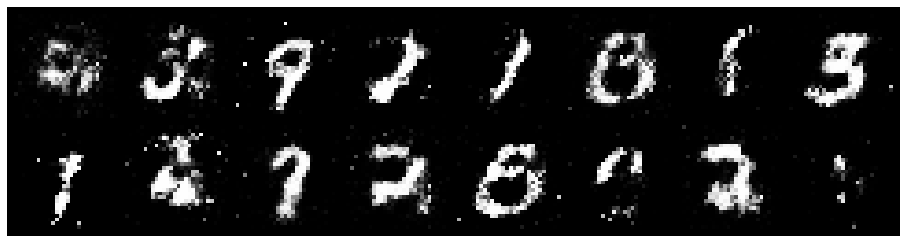

Epoch: [19/200], Batch Num: [500/600]
Discriminator Loss: 0.7081, Generator Loss: 2.0050
D(x): 0.7388, D(G(z)): 0.2444


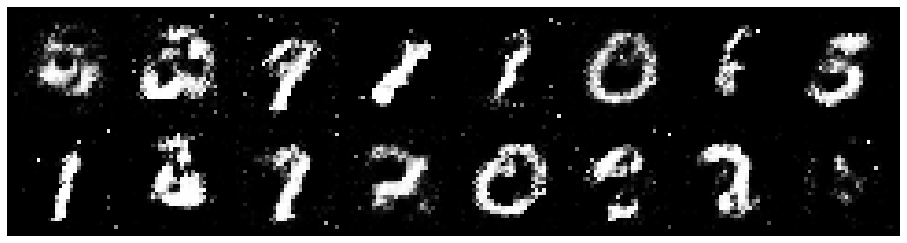

Epoch: [20/200], Batch Num: [0/600]
Discriminator Loss: 0.9038, Generator Loss: 1.8013
D(x): 0.7123, D(G(z)): 0.2603


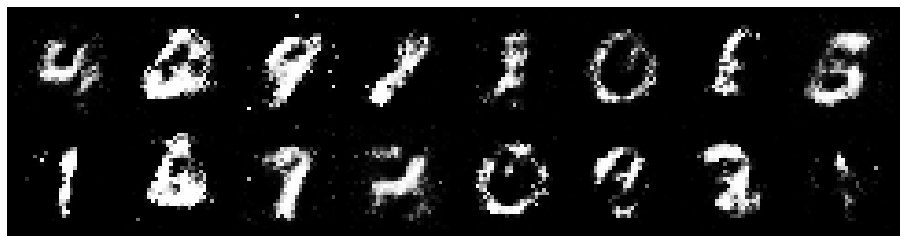

Epoch: [20/200], Batch Num: [100/600]
Discriminator Loss: 0.8513, Generator Loss: 1.6438
D(x): 0.7054, D(G(z)): 0.2757


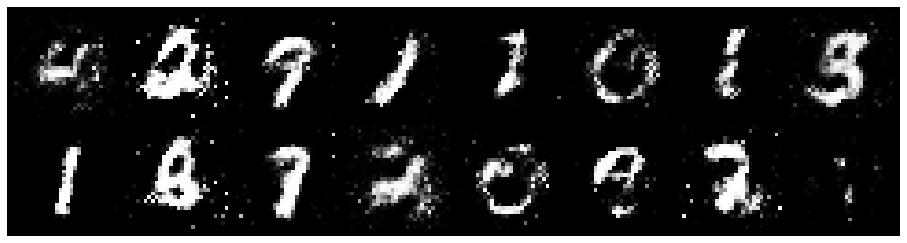

Epoch: [20/200], Batch Num: [200/600]
Discriminator Loss: 0.8963, Generator Loss: 1.8350
D(x): 0.6464, D(G(z)): 0.2224


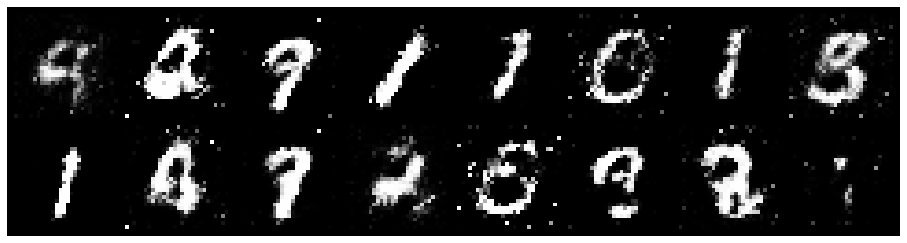

Epoch: [20/200], Batch Num: [300/600]
Discriminator Loss: 0.8567, Generator Loss: 1.9806
D(x): 0.6731, D(G(z)): 0.2144


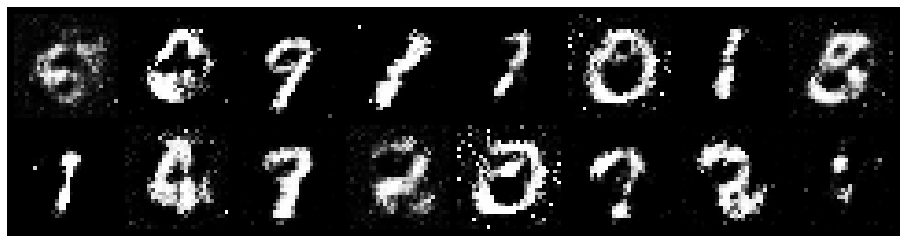

Epoch: [20/200], Batch Num: [400/600]
Discriminator Loss: 1.0433, Generator Loss: 1.1453
D(x): 0.7253, D(G(z)): 0.3531


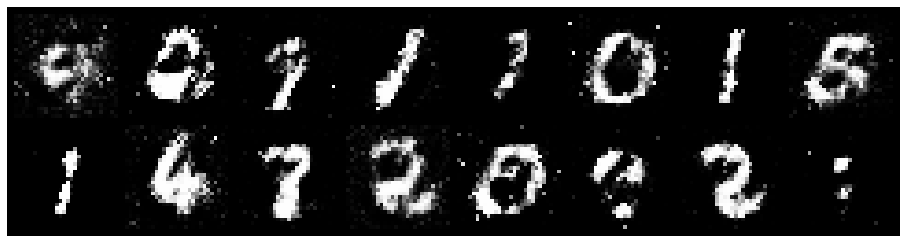

Epoch: [20/200], Batch Num: [500/600]
Discriminator Loss: 0.8201, Generator Loss: 2.0354
D(x): 0.6913, D(G(z)): 0.2458


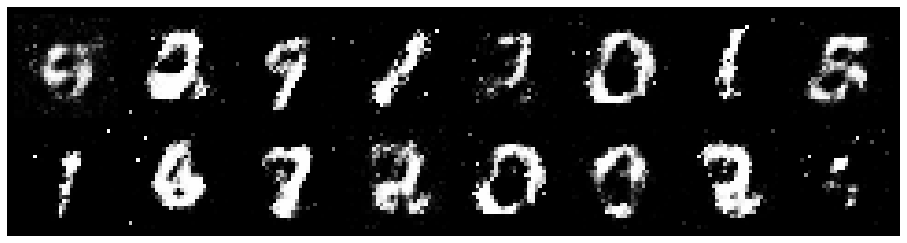

Epoch: [21/200], Batch Num: [0/600]
Discriminator Loss: 0.8829, Generator Loss: 1.8610
D(x): 0.7458, D(G(z)): 0.2968


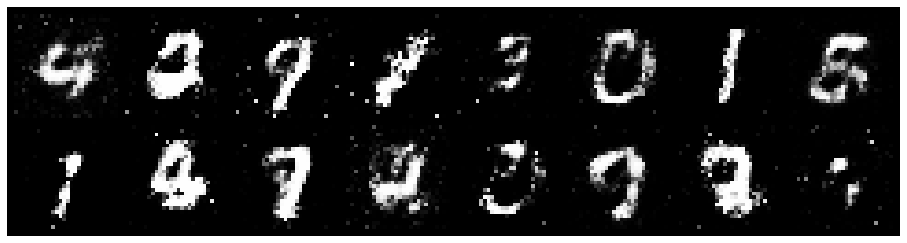

Epoch: [21/200], Batch Num: [100/600]
Discriminator Loss: 0.9129, Generator Loss: 1.7108
D(x): 0.6855, D(G(z)): 0.2809


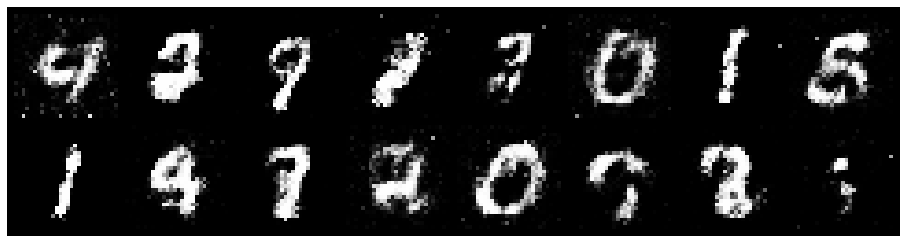

Epoch: [21/200], Batch Num: [200/600]
Discriminator Loss: 0.6784, Generator Loss: 1.7732
D(x): 0.8490, D(G(z)): 0.3010


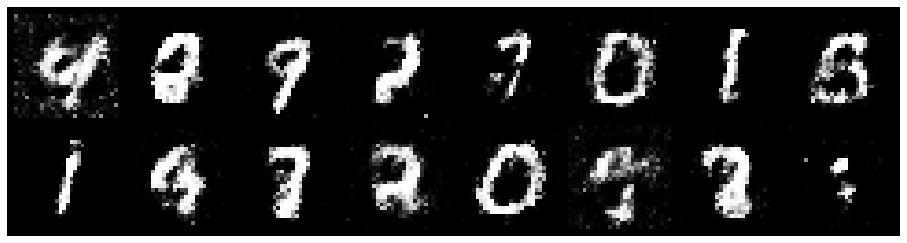

Epoch: [21/200], Batch Num: [300/600]
Discriminator Loss: 0.8730, Generator Loss: 1.5596
D(x): 0.6889, D(G(z)): 0.2605


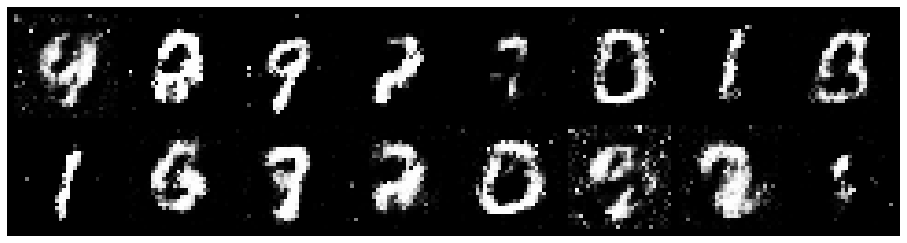

Epoch: [21/200], Batch Num: [400/600]
Discriminator Loss: 0.7962, Generator Loss: 1.5993
D(x): 0.7559, D(G(z)): 0.3037


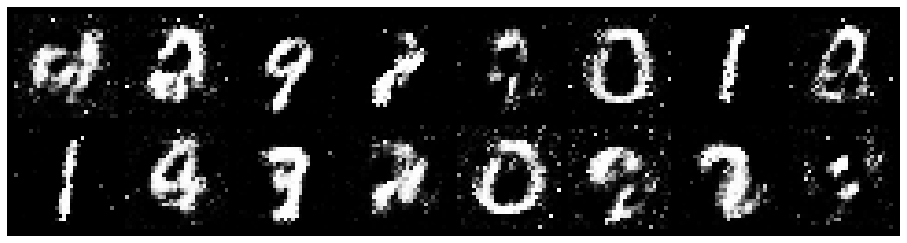

Epoch: [21/200], Batch Num: [500/600]
Discriminator Loss: 0.8799, Generator Loss: 1.6006
D(x): 0.6457, D(G(z)): 0.2574


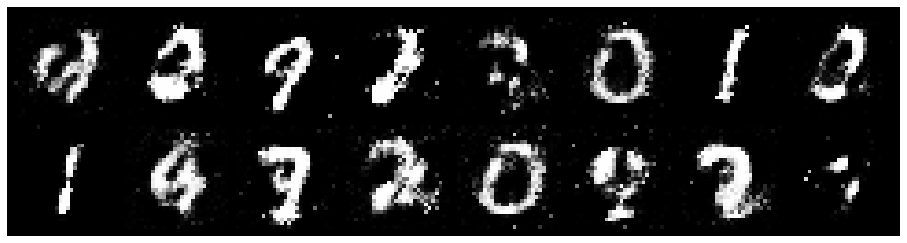

Epoch: [22/200], Batch Num: [0/600]
Discriminator Loss: 0.8928, Generator Loss: 1.4024
D(x): 0.7042, D(G(z)): 0.3171


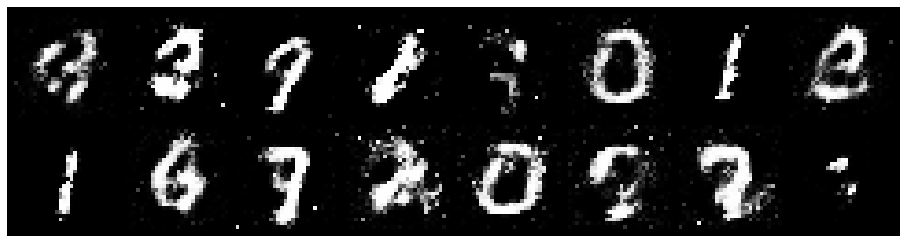

Epoch: [22/200], Batch Num: [100/600]
Discriminator Loss: 0.7164, Generator Loss: 1.9349
D(x): 0.7664, D(G(z)): 0.2464


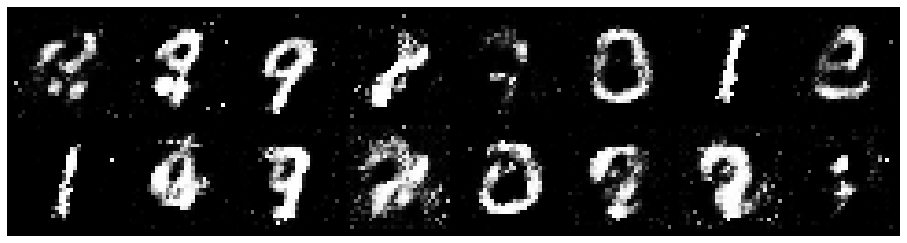

Epoch: [22/200], Batch Num: [200/600]
Discriminator Loss: 0.8886, Generator Loss: 1.9260
D(x): 0.7039, D(G(z)): 0.2693


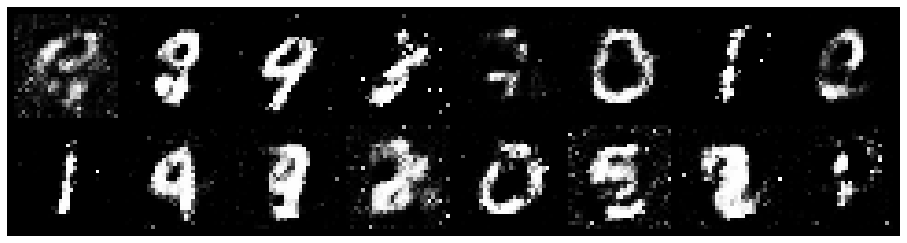

Epoch: [22/200], Batch Num: [300/600]
Discriminator Loss: 1.0511, Generator Loss: 1.5777
D(x): 0.6875, D(G(z)): 0.3501


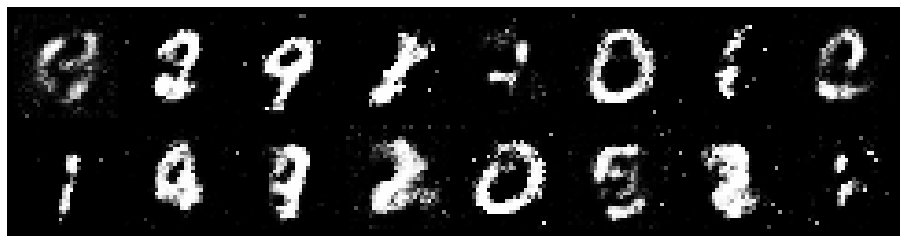

Epoch: [22/200], Batch Num: [400/600]
Discriminator Loss: 1.0200, Generator Loss: 1.3584
D(x): 0.7192, D(G(z)): 0.3613


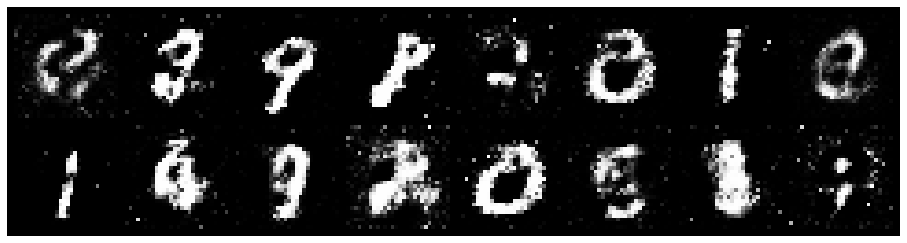

Epoch: [22/200], Batch Num: [500/600]
Discriminator Loss: 0.9911, Generator Loss: 1.2501
D(x): 0.6916, D(G(z)): 0.3496


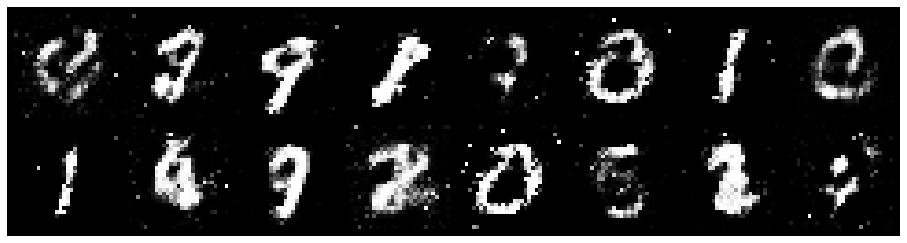

Epoch: [23/200], Batch Num: [0/600]
Discriminator Loss: 0.7586, Generator Loss: 1.4254
D(x): 0.7537, D(G(z)): 0.2947


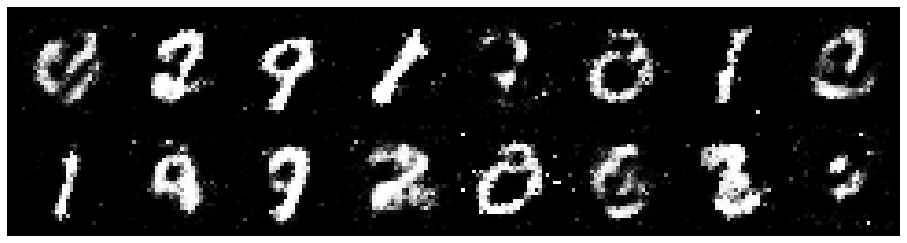

Epoch: [23/200], Batch Num: [100/600]
Discriminator Loss: 0.7866, Generator Loss: 1.6154
D(x): 0.7390, D(G(z)): 0.2378


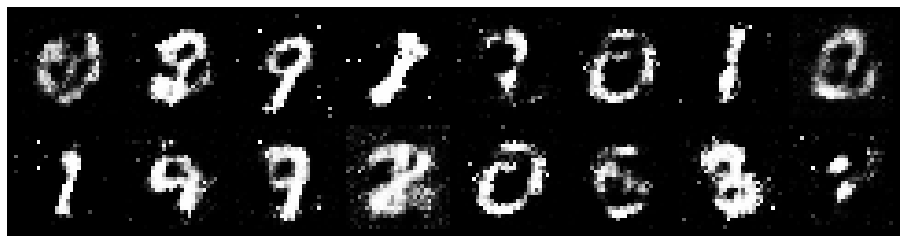

Epoch: [23/200], Batch Num: [200/600]
Discriminator Loss: 1.1532, Generator Loss: 1.5357
D(x): 0.6251, D(G(z)): 0.3079


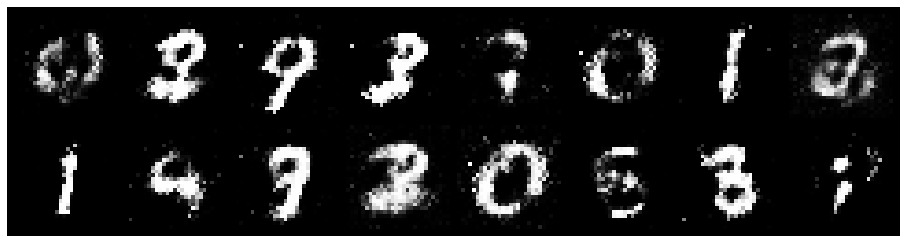

Epoch: [23/200], Batch Num: [300/600]
Discriminator Loss: 1.0186, Generator Loss: 1.2747
D(x): 0.7447, D(G(z)): 0.4028


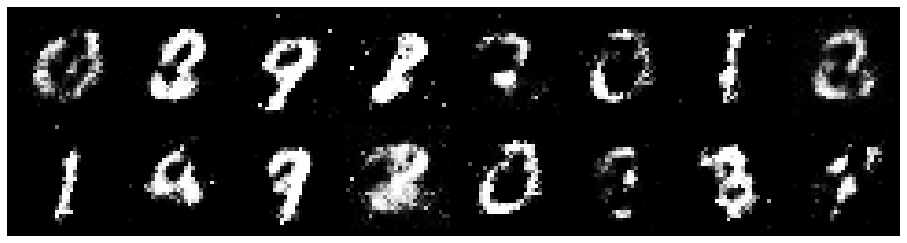

Epoch: [23/200], Batch Num: [400/600]
Discriminator Loss: 1.1436, Generator Loss: 1.4531
D(x): 0.5650, D(G(z)): 0.2985


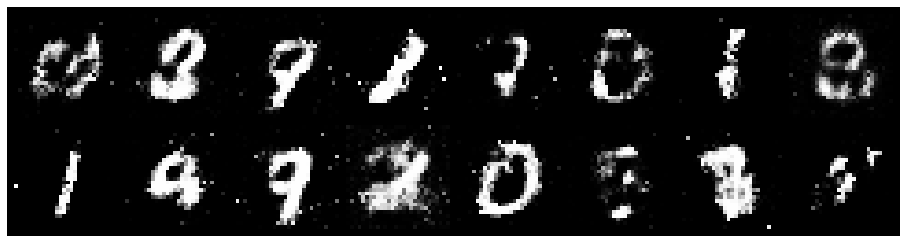

Epoch: [23/200], Batch Num: [500/600]
Discriminator Loss: 0.8454, Generator Loss: 1.5772
D(x): 0.6796, D(G(z)): 0.2972


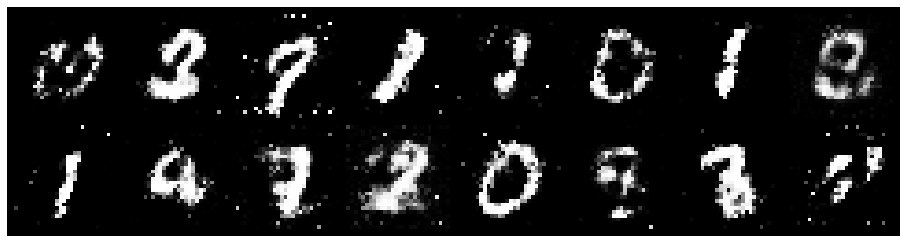

Epoch: [24/200], Batch Num: [0/600]
Discriminator Loss: 0.7046, Generator Loss: 1.6867
D(x): 0.7795, D(G(z)): 0.2884


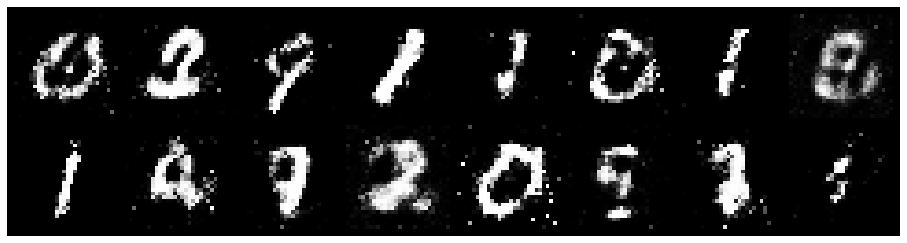

Epoch: [24/200], Batch Num: [100/600]
Discriminator Loss: 0.7831, Generator Loss: 1.8219
D(x): 0.6973, D(G(z)): 0.2455


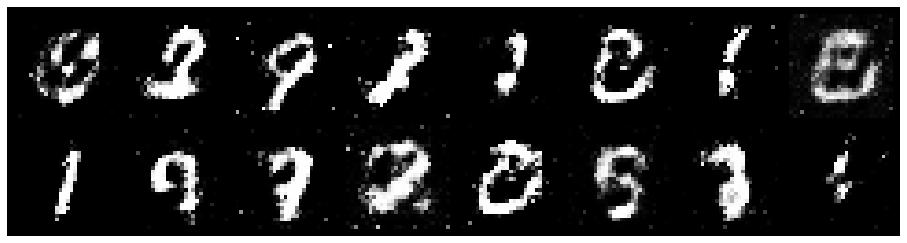

Epoch: [24/200], Batch Num: [200/600]
Discriminator Loss: 1.0162, Generator Loss: 1.6154
D(x): 0.6561, D(G(z)): 0.2568


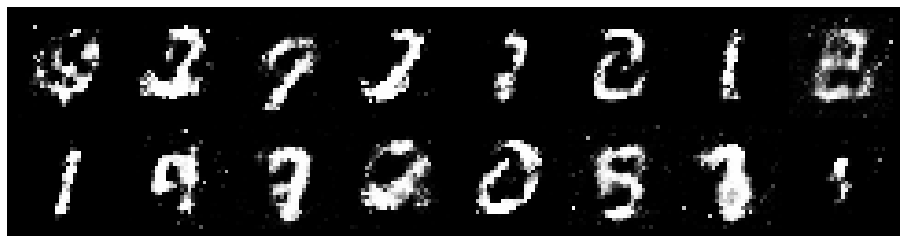

Epoch: [24/200], Batch Num: [300/600]
Discriminator Loss: 0.8677, Generator Loss: 1.4639
D(x): 0.7121, D(G(z)): 0.2930


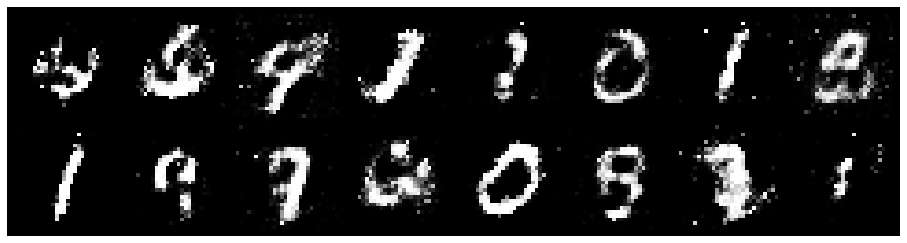

Epoch: [24/200], Batch Num: [400/600]
Discriminator Loss: 0.8580, Generator Loss: 1.4742
D(x): 0.6979, D(G(z)): 0.2928


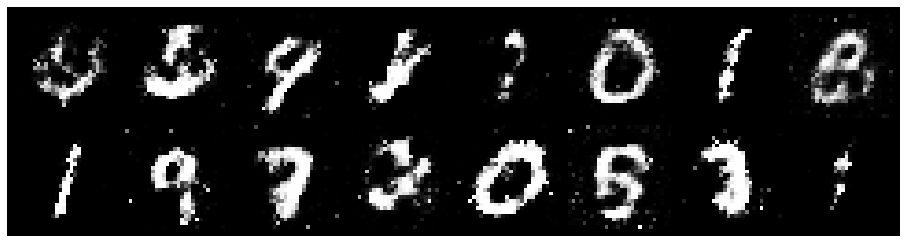

Epoch: [24/200], Batch Num: [500/600]
Discriminator Loss: 1.0430, Generator Loss: 1.3171
D(x): 0.6229, D(G(z)): 0.3251


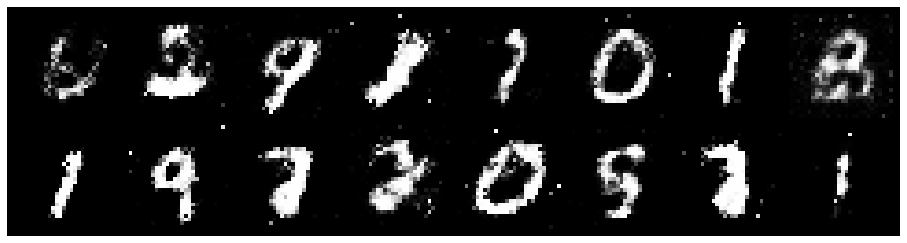

Epoch: [25/200], Batch Num: [0/600]
Discriminator Loss: 0.9636, Generator Loss: 1.4658
D(x): 0.6573, D(G(z)): 0.3067


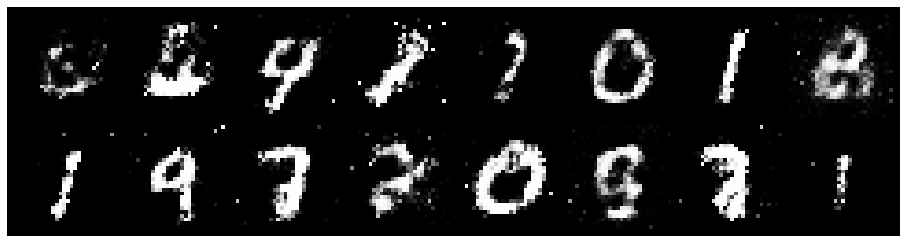

Epoch: [25/200], Batch Num: [100/600]
Discriminator Loss: 0.9589, Generator Loss: 1.4704
D(x): 0.6956, D(G(z)): 0.3513


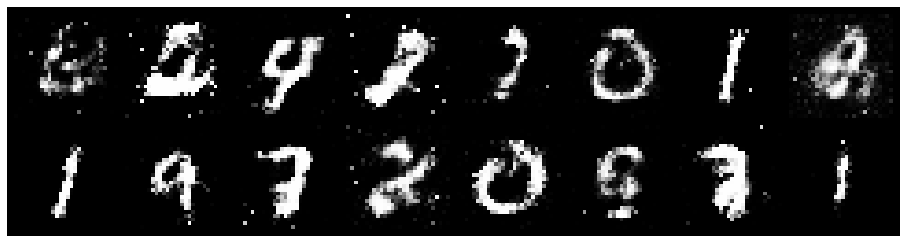

Epoch: [25/200], Batch Num: [200/600]
Discriminator Loss: 0.9617, Generator Loss: 1.3601
D(x): 0.6460, D(G(z)): 0.3083


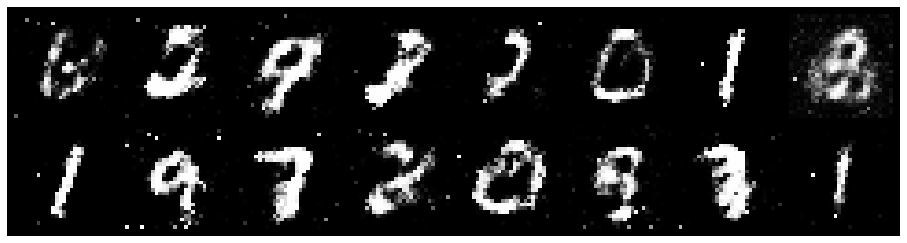

Epoch: [25/200], Batch Num: [300/600]
Discriminator Loss: 0.8689, Generator Loss: 1.7101
D(x): 0.7795, D(G(z)): 0.3293


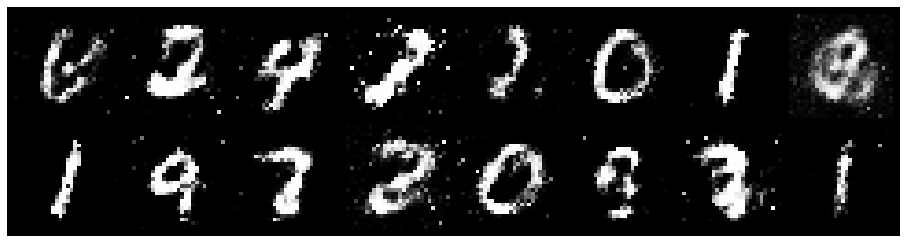

Epoch: [25/200], Batch Num: [400/600]
Discriminator Loss: 1.1258, Generator Loss: 1.5333
D(x): 0.6933, D(G(z)): 0.3921


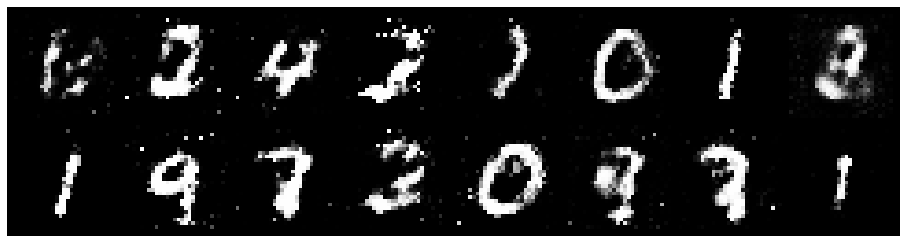

Epoch: [25/200], Batch Num: [500/600]
Discriminator Loss: 1.1947, Generator Loss: 1.2524
D(x): 0.5798, D(G(z)): 0.3622


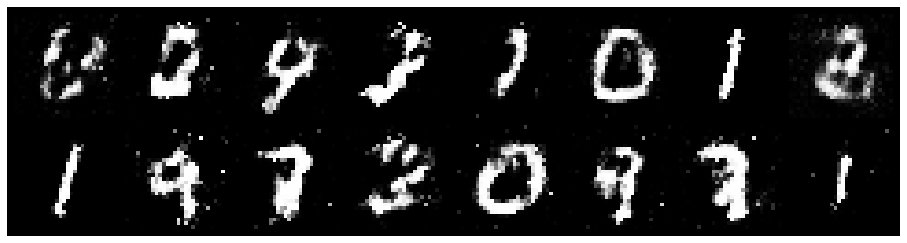

Epoch: [26/200], Batch Num: [0/600]
Discriminator Loss: 1.0387, Generator Loss: 1.2360
D(x): 0.6530, D(G(z)): 0.3390


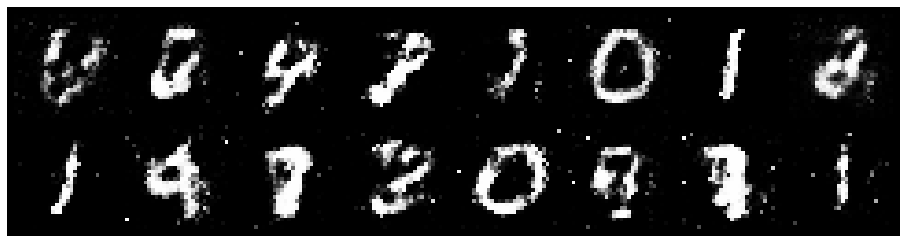

Epoch: [26/200], Batch Num: [100/600]
Discriminator Loss: 0.9073, Generator Loss: 1.4080
D(x): 0.7518, D(G(z)): 0.3849


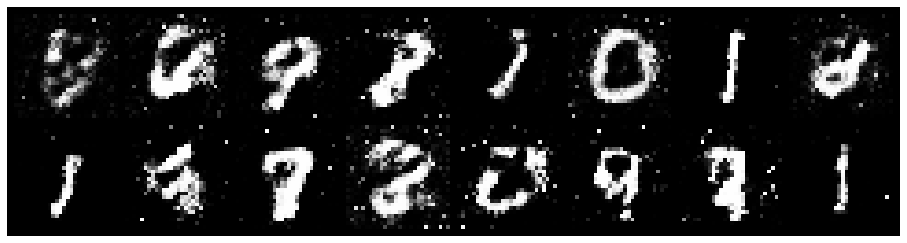

Epoch: [26/200], Batch Num: [200/600]
Discriminator Loss: 0.8897, Generator Loss: 1.8380
D(x): 0.7657, D(G(z)): 0.3358


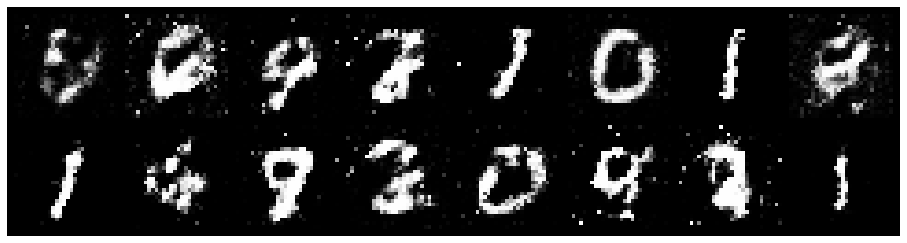

Epoch: [26/200], Batch Num: [300/600]
Discriminator Loss: 1.1132, Generator Loss: 1.2506
D(x): 0.5867, D(G(z)): 0.2765


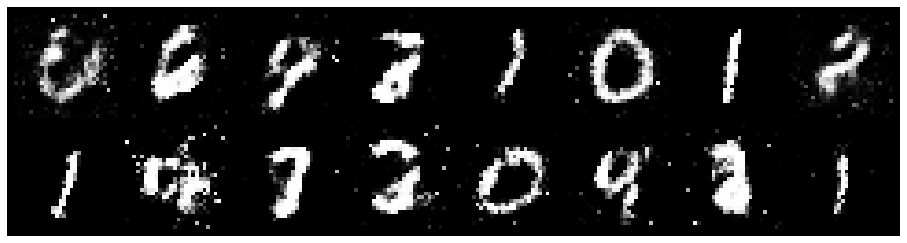

Epoch: [26/200], Batch Num: [400/600]
Discriminator Loss: 1.0290, Generator Loss: 1.3329
D(x): 0.5998, D(G(z)): 0.3023


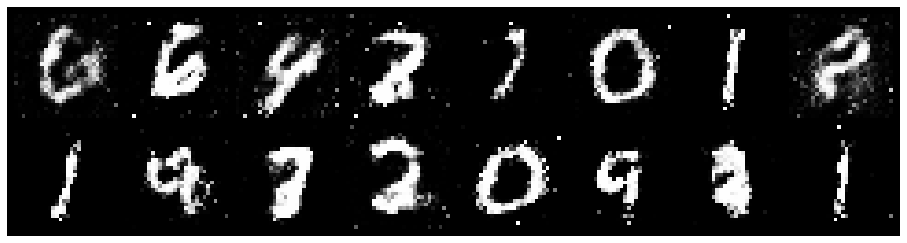

Epoch: [26/200], Batch Num: [500/600]
Discriminator Loss: 1.0272, Generator Loss: 1.2499
D(x): 0.6732, D(G(z)): 0.3746


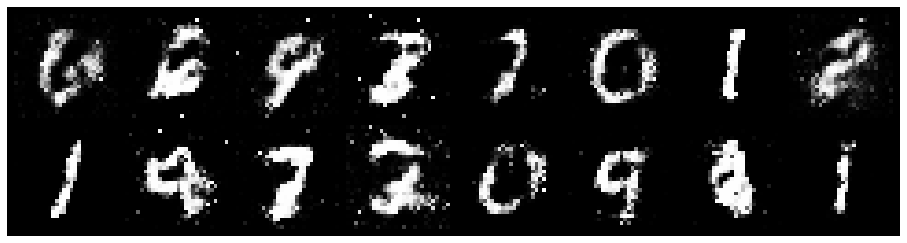

Epoch: [27/200], Batch Num: [0/600]
Discriminator Loss: 0.9203, Generator Loss: 1.5875
D(x): 0.6801, D(G(z)): 0.3115


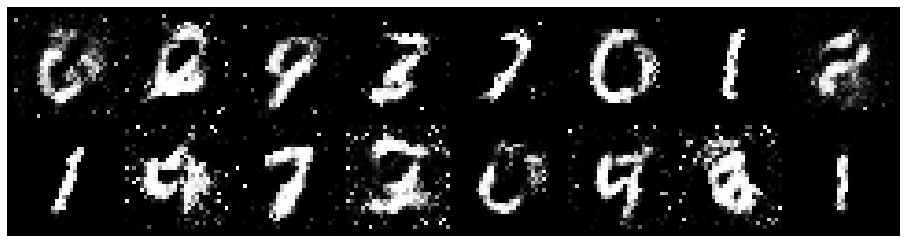

Epoch: [27/200], Batch Num: [100/600]
Discriminator Loss: 0.8011, Generator Loss: 1.6757
D(x): 0.7266, D(G(z)): 0.2952


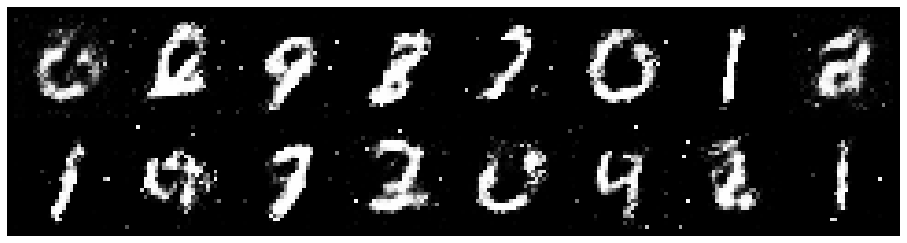

Epoch: [27/200], Batch Num: [200/600]
Discriminator Loss: 1.0913, Generator Loss: 1.3288
D(x): 0.6013, D(G(z)): 0.3128


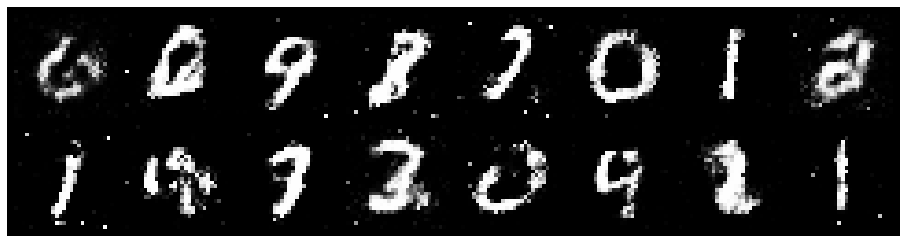

Epoch: [27/200], Batch Num: [300/600]
Discriminator Loss: 1.0717, Generator Loss: 1.3422
D(x): 0.6168, D(G(z)): 0.2822


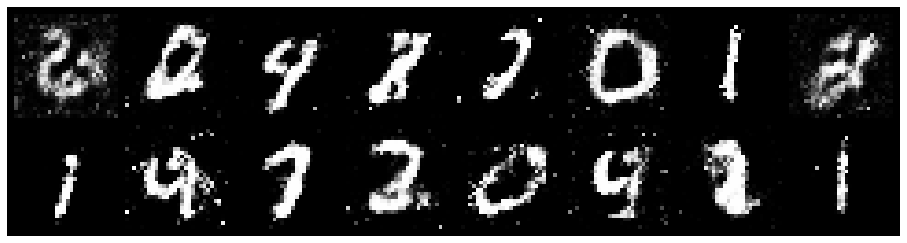

Epoch: [27/200], Batch Num: [400/600]
Discriminator Loss: 1.1095, Generator Loss: 1.4093
D(x): 0.7534, D(G(z)): 0.4628


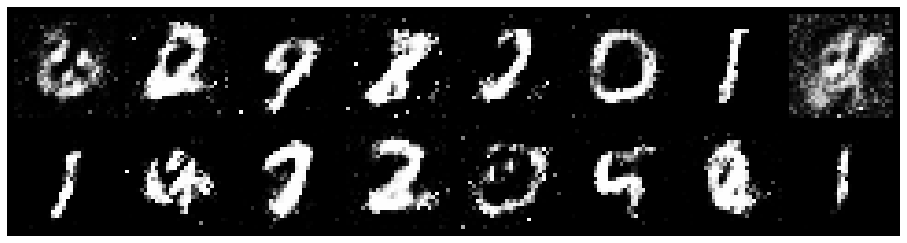

Epoch: [27/200], Batch Num: [500/600]
Discriminator Loss: 1.0245, Generator Loss: 1.4709
D(x): 0.6154, D(G(z)): 0.2697


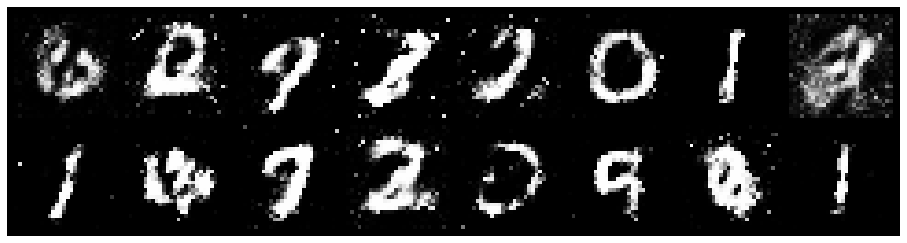

Epoch: [28/200], Batch Num: [0/600]
Discriminator Loss: 1.0236, Generator Loss: 1.5051
D(x): 0.6853, D(G(z)): 0.3264


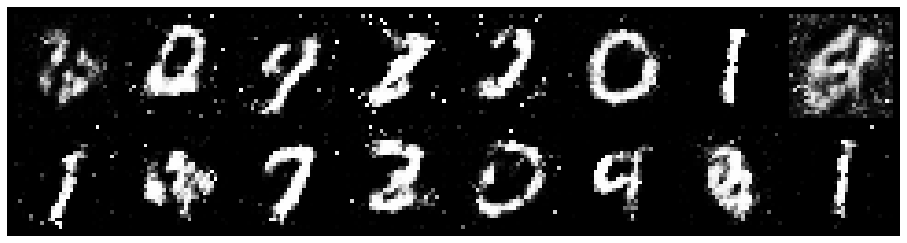

Epoch: [28/200], Batch Num: [100/600]
Discriminator Loss: 1.0261, Generator Loss: 0.9862
D(x): 0.6910, D(G(z)): 0.3839


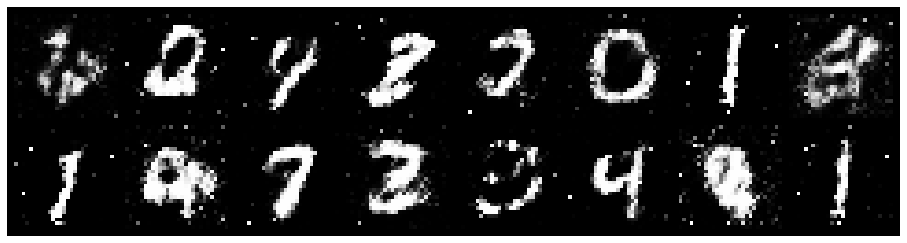

Epoch: [28/200], Batch Num: [200/600]
Discriminator Loss: 0.9201, Generator Loss: 1.3267
D(x): 0.7279, D(G(z)): 0.3572


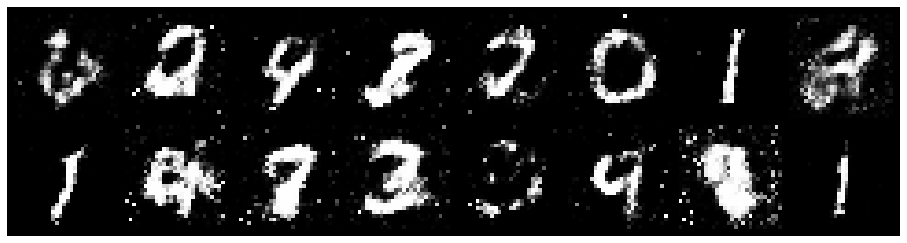

Epoch: [28/200], Batch Num: [300/600]
Discriminator Loss: 0.8967, Generator Loss: 1.8728
D(x): 0.6598, D(G(z)): 0.2459


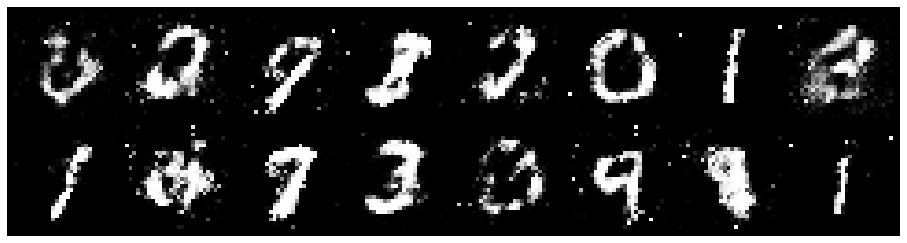

Epoch: [28/200], Batch Num: [400/600]
Discriminator Loss: 0.8600, Generator Loss: 1.4330
D(x): 0.7474, D(G(z)): 0.3169


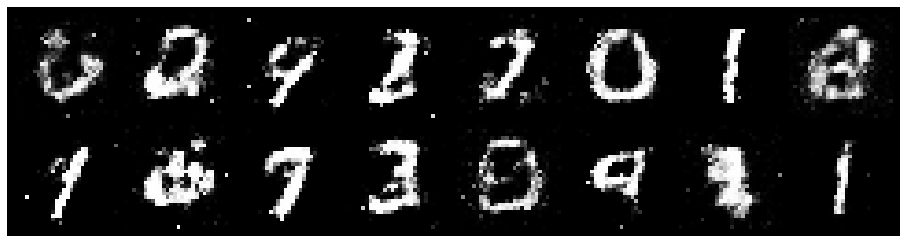

Epoch: [28/200], Batch Num: [500/600]
Discriminator Loss: 1.1989, Generator Loss: 1.2217
D(x): 0.6382, D(G(z)): 0.4007


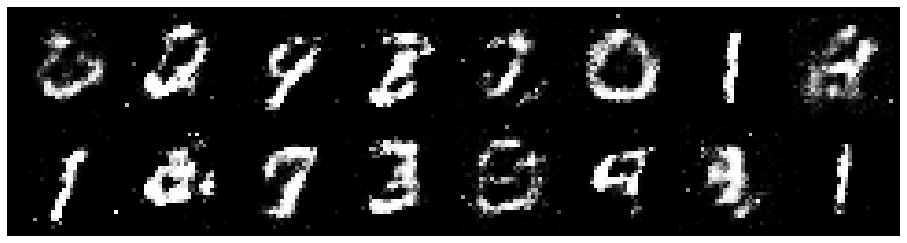

Epoch: [29/200], Batch Num: [0/600]
Discriminator Loss: 1.0316, Generator Loss: 0.9010
D(x): 0.6964, D(G(z)): 0.4279


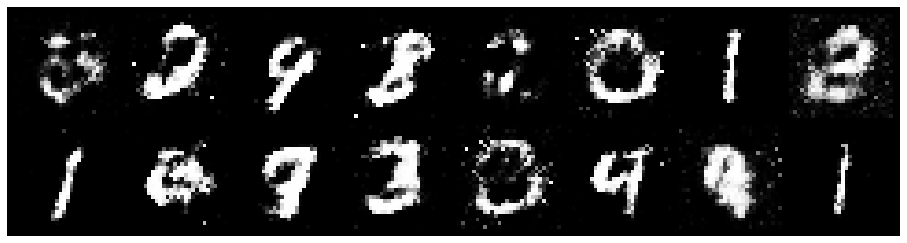

Epoch: [29/200], Batch Num: [100/600]
Discriminator Loss: 0.8676, Generator Loss: 1.1463
D(x): 0.7049, D(G(z)): 0.3317


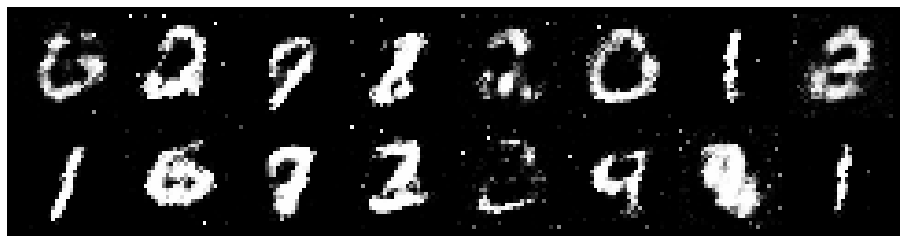

Epoch: [29/200], Batch Num: [200/600]
Discriminator Loss: 0.8896, Generator Loss: 1.3397
D(x): 0.7142, D(G(z)): 0.3259


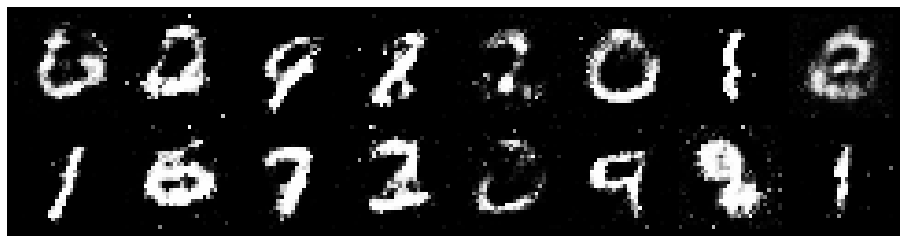

Epoch: [29/200], Batch Num: [300/600]
Discriminator Loss: 0.9407, Generator Loss: 1.3670
D(x): 0.6788, D(G(z)): 0.3188


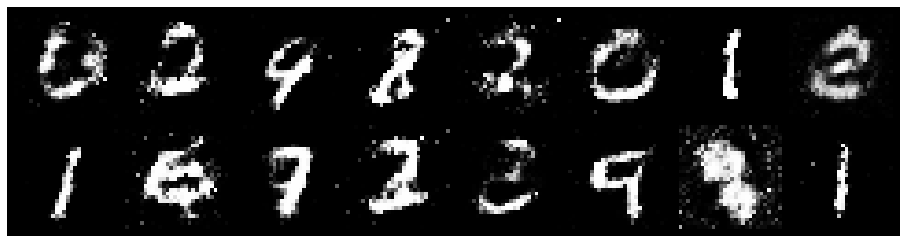

Epoch: [29/200], Batch Num: [400/600]
Discriminator Loss: 1.1567, Generator Loss: 1.3516
D(x): 0.6348, D(G(z)): 0.3728


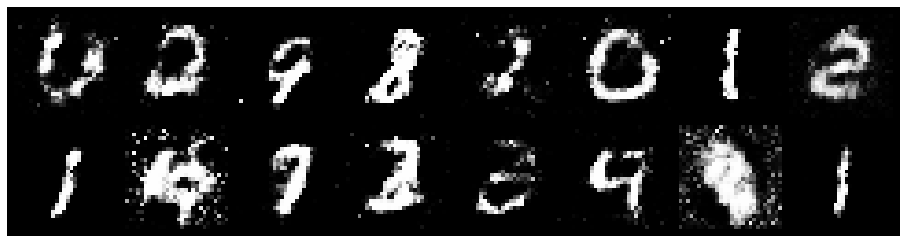

Epoch: [29/200], Batch Num: [500/600]
Discriminator Loss: 1.0961, Generator Loss: 1.1440
D(x): 0.6816, D(G(z)): 0.4061


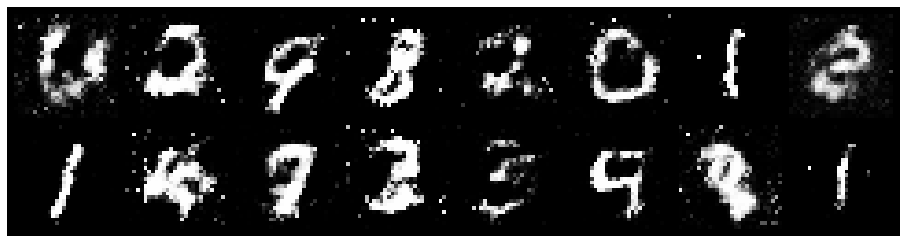

Epoch: [30/200], Batch Num: [0/600]
Discriminator Loss: 0.8157, Generator Loss: 1.3105
D(x): 0.6969, D(G(z)): 0.2876


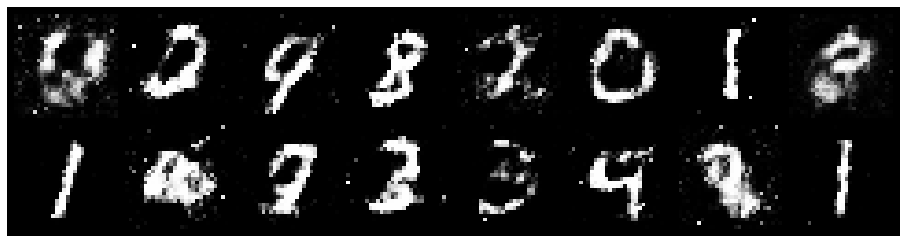

Epoch: [30/200], Batch Num: [100/600]
Discriminator Loss: 1.1438, Generator Loss: 1.2226
D(x): 0.6075, D(G(z)): 0.3248


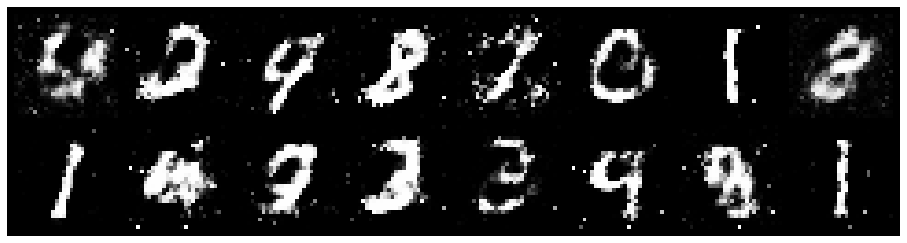

Epoch: [30/200], Batch Num: [200/600]
Discriminator Loss: 1.4261, Generator Loss: 1.4936
D(x): 0.5567, D(G(z)): 0.3849


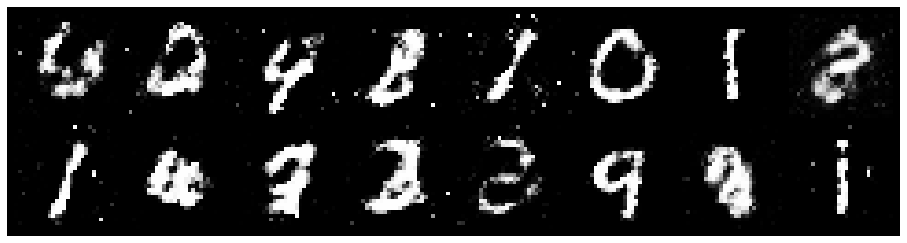

Epoch: [30/200], Batch Num: [300/600]
Discriminator Loss: 1.2128, Generator Loss: 1.1415
D(x): 0.6750, D(G(z)): 0.4400


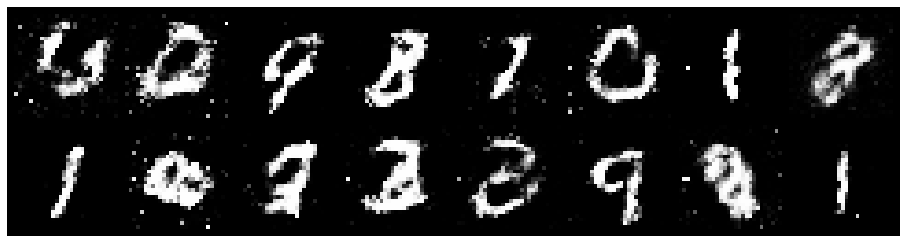

Epoch: [30/200], Batch Num: [400/600]
Discriminator Loss: 1.1717, Generator Loss: 1.4134
D(x): 0.5270, D(G(z)): 0.2683


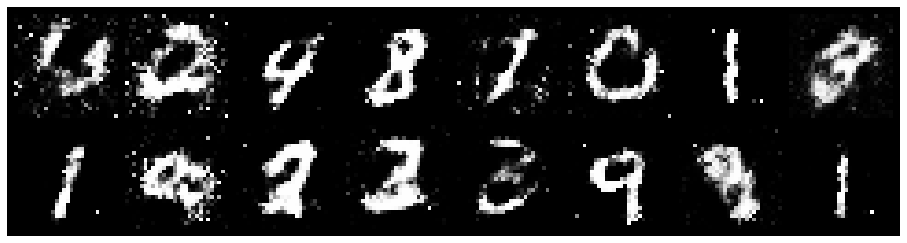

Epoch: [30/200], Batch Num: [500/600]
Discriminator Loss: 1.1193, Generator Loss: 1.2884
D(x): 0.6457, D(G(z)): 0.3482


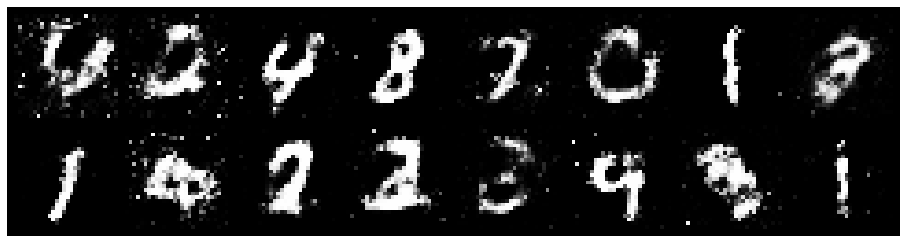

Epoch: [31/200], Batch Num: [0/600]
Discriminator Loss: 0.9543, Generator Loss: 1.6824
D(x): 0.6506, D(G(z)): 0.2813


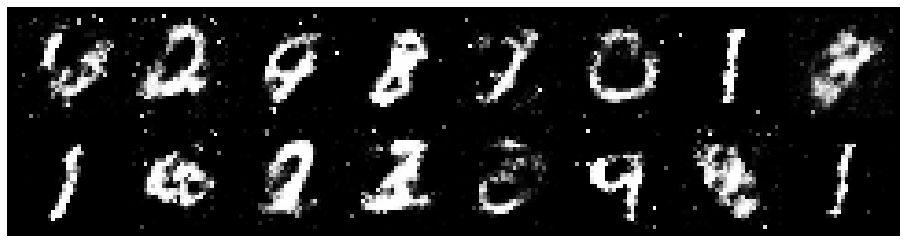

Epoch: [31/200], Batch Num: [100/600]
Discriminator Loss: 1.0758, Generator Loss: 1.2265
D(x): 0.6581, D(G(z)): 0.3653


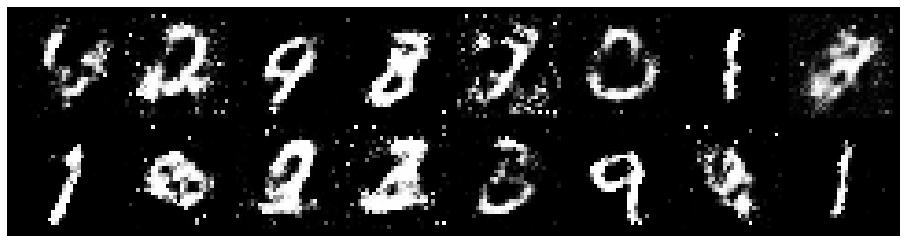

Epoch: [31/200], Batch Num: [200/600]
Discriminator Loss: 0.9761, Generator Loss: 1.1581
D(x): 0.7033, D(G(z)): 0.3765


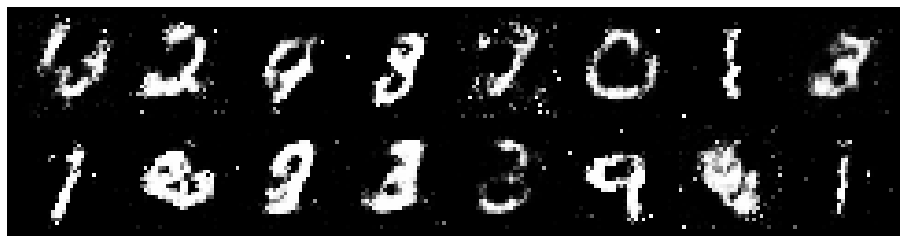

Epoch: [31/200], Batch Num: [300/600]
Discriminator Loss: 0.8842, Generator Loss: 1.3865
D(x): 0.6910, D(G(z)): 0.3269


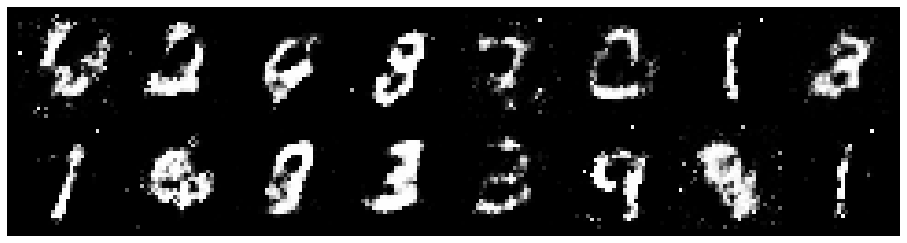

Epoch: [31/200], Batch Num: [400/600]
Discriminator Loss: 1.2845, Generator Loss: 1.1304
D(x): 0.5944, D(G(z)): 0.4030


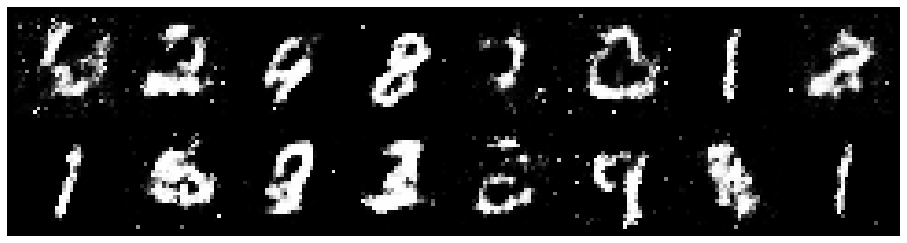

Epoch: [31/200], Batch Num: [500/600]
Discriminator Loss: 1.0323, Generator Loss: 1.2061
D(x): 0.6599, D(G(z)): 0.3736


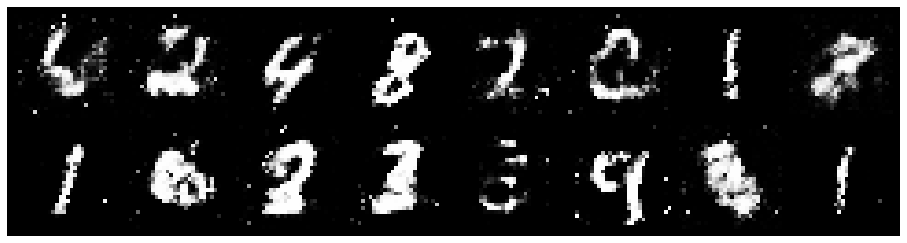

Epoch: [32/200], Batch Num: [0/600]
Discriminator Loss: 0.9131, Generator Loss: 1.5027
D(x): 0.6955, D(G(z)): 0.3108


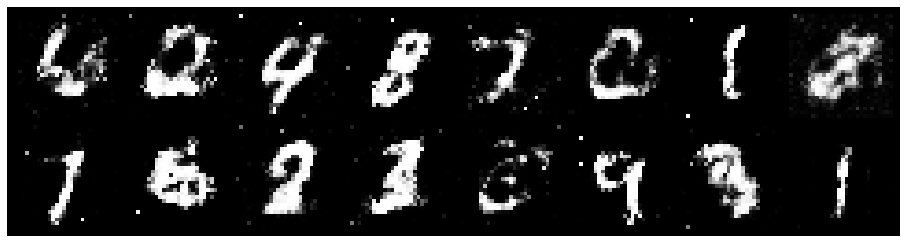

Epoch: [32/200], Batch Num: [100/600]
Discriminator Loss: 1.0481, Generator Loss: 1.5387
D(x): 0.5604, D(G(z)): 0.2565


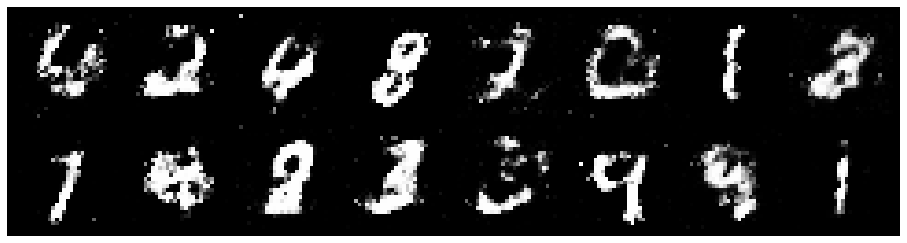

Epoch: [32/200], Batch Num: [200/600]
Discriminator Loss: 0.9775, Generator Loss: 1.2308
D(x): 0.7080, D(G(z)): 0.3730


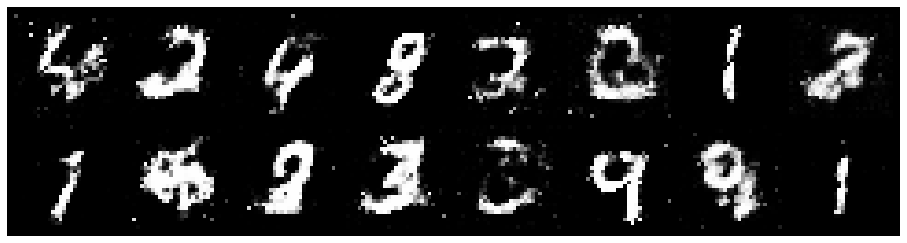

Epoch: [32/200], Batch Num: [300/600]
Discriminator Loss: 1.0868, Generator Loss: 1.3539
D(x): 0.7335, D(G(z)): 0.4031


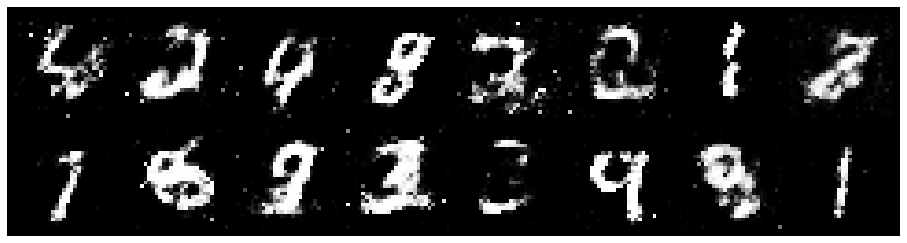

Epoch: [32/200], Batch Num: [400/600]
Discriminator Loss: 0.9235, Generator Loss: 1.3322
D(x): 0.7321, D(G(z)): 0.3569


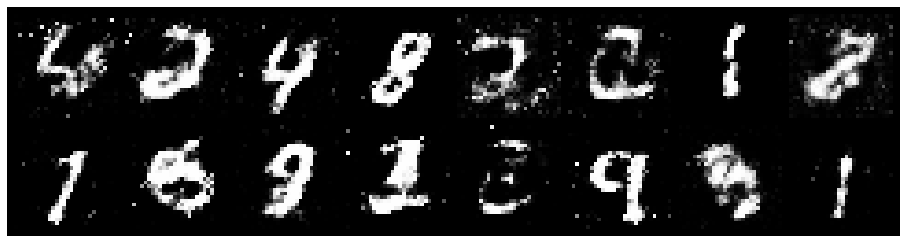

Epoch: [32/200], Batch Num: [500/600]
Discriminator Loss: 1.1942, Generator Loss: 0.9583
D(x): 0.6374, D(G(z)): 0.3998


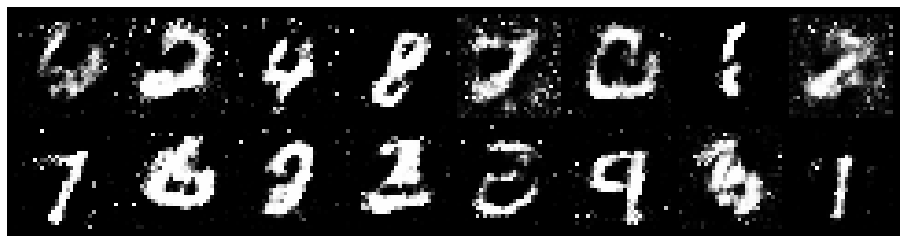

Epoch: [33/200], Batch Num: [0/600]
Discriminator Loss: 1.1181, Generator Loss: 1.2255
D(x): 0.5658, D(G(z)): 0.3317


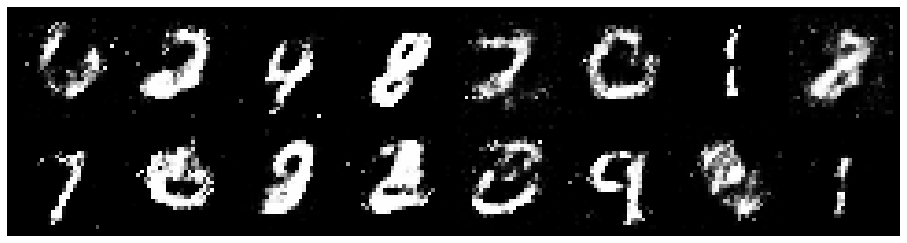

Epoch: [33/200], Batch Num: [100/600]
Discriminator Loss: 0.9998, Generator Loss: 1.5508
D(x): 0.6784, D(G(z)): 0.3353


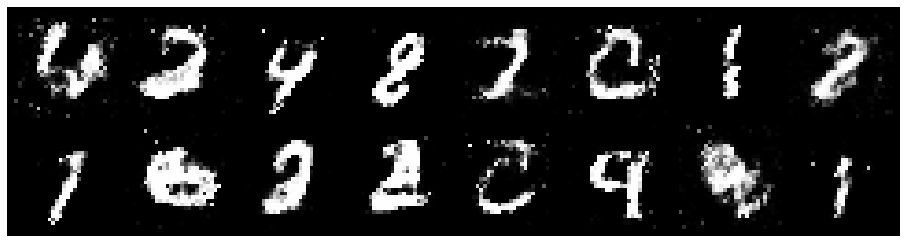

Epoch: [33/200], Batch Num: [200/600]
Discriminator Loss: 1.1401, Generator Loss: 1.1772
D(x): 0.6432, D(G(z)): 0.3859


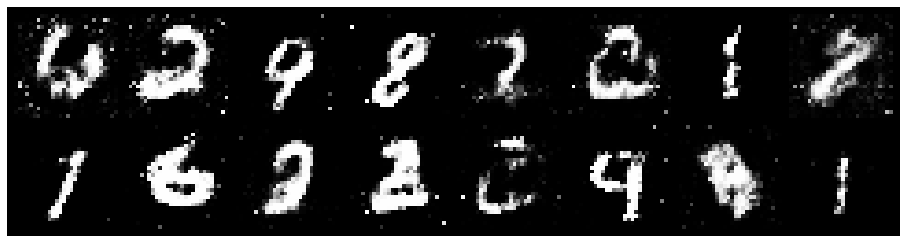

Epoch: [33/200], Batch Num: [300/600]
Discriminator Loss: 0.9122, Generator Loss: 1.4126
D(x): 0.7169, D(G(z)): 0.3271


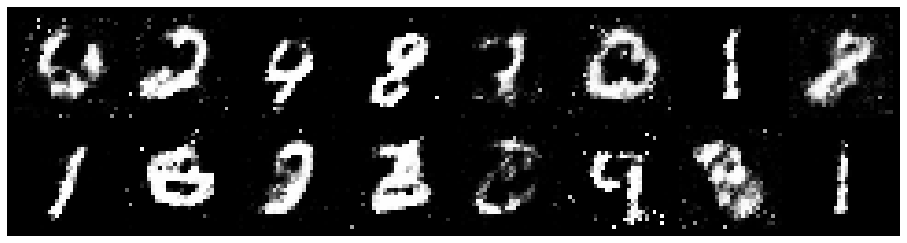

Epoch: [33/200], Batch Num: [400/600]
Discriminator Loss: 1.3614, Generator Loss: 1.4531
D(x): 0.5011, D(G(z)): 0.2895


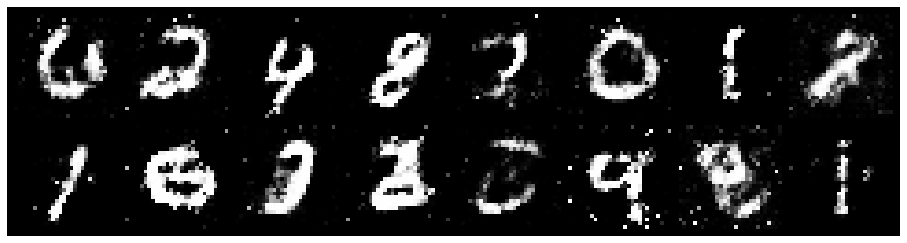

Epoch: [33/200], Batch Num: [500/600]
Discriminator Loss: 1.0186, Generator Loss: 1.4142
D(x): 0.5906, D(G(z)): 0.2847


KeyboardInterrupt: 

In [8]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )

tensor([[-1.1602, -2.3159,  1.1064,  ...,  0.8097, -1.4386,  0.3349],
        [ 0.8191,  0.0760,  1.2701,  ..., -0.2361,  0.7613,  0.3464],
        [ 2.3489, -1.0565,  0.6012,  ..., -1.8133,  0.1221, -0.1865],
        ...,
        [ 0.2416,  1.7628,  0.3059,  ..., -0.1300,  1.0383, -0.2541],
        [ 1.6010,  0.9563, -0.1272,  ..., -0.9897,  2.1732, -0.7878],
        [ 0.5958, -0.7061,  0.5957,  ..., -0.2761,  0.3862,  0.2934]])


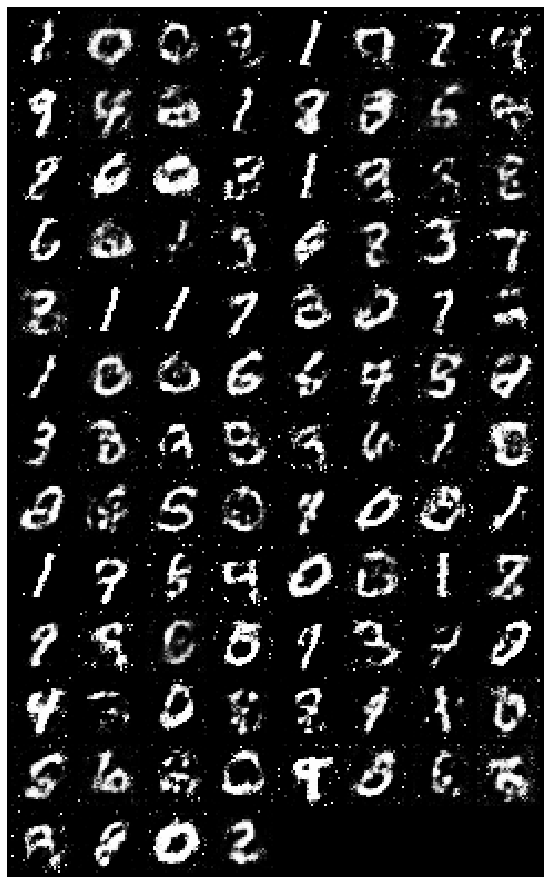

In [15]:
gen_noise = noise(100)
print(gen_noise)
fake_data = generator(gen_noise)
test_images = vectors_to_images(fake_data)
test_images = test_images.data
logger.log_images(
                test_images, 1, 
                1, 1, 1
            );